# Modelo de Propension de Compra

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importamos librería

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import xgboost as xgb # gradient boosting decision tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import export_graphviz
import graphviz

import pickle








### Data Preparation

In [3]:
df_cust_demo =pd.read_csv('/content/drive/MyDrive/TFM/Datasets_merge/df_cust_demo.csv')

In [4]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       int64  
 4   active_customer     int64  
 5   segment             int64  
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  credit_card         int64  
 13  payroll             int64  
 14  pension_plan        int64  
 15  payroll_account     int64  
 16  emc_account         int64  
 17  debit_card          int64  
 18  em_account_p        int64  
 19  em_acount           int64  
 20  country_id          int64  
 21  region_code         int64  
 22  gender              int64  
 23  age                 int64  
 24  salary              floa

In [5]:
# nos facilita la visualizacion del dataframe completo
pd.set_option('display.max_columns', None)

In [6]:
df_cust_demo.shape

(5929961, 25)

In [7]:
df_cust_demo['pk_partition']

0          2018-01
1          2018-01
2          2018-01
3          2018-01
4          2018-01
            ...   
5929956    2019-05
5929957    2019-05
5929958    2019-05
5929959    2019-05
5929960    2019-05
Name: pk_partition, Length: 5929961, dtype: object

In [8]:
df_cust_demo['entry_date']

0          2018-01
1          2015-08
2          2015-08
3          2015-08
4          2015-08
            ...   
5929956    2016-08
5929957    2016-08
5929958    2016-08
5929959    2016-08
5929960    2019-05
Name: entry_date, Length: 5929961, dtype: object

In [9]:
# Hacemos un cast to_datetime de la variable 'month_sale'
df_cust_demo['entry_date'] = pd.to_datetime(df_cust_demo['entry_date'])
df_cust_demo['pk_partition'] = pd.to_datetime(df_cust_demo['pk_partition'])

In [10]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       int64         
 4   active_customer     int64         
 5   segment             int64         
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  credit_card         int64         
 13  payroll             int64         
 14  pension_plan        int64         
 15  payroll_account     int64         
 16  emc_account         int64         
 17  debit_card          int64         
 18  em_account_p        int64         
 19  em_acount           int64         
 20  co

In [11]:
df_cust_demo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [12]:
#Extraemos para situarnos los valores de pk_partition
df_cust_demo['pk_partition'].value_counts()

2019-05-01    440572
2019-04-01    437235
2019-03-01    433840
2019-02-01    429424
2019-01-01    424638
2018-12-01    420302
2018-11-01    414308
2018-10-01    400271
2018-09-01    373328
2018-08-01    350981
2018-07-01    337428
2018-06-01    250488
2018-05-01    248333
2018-04-01    245922
2018-03-01    243763
2018-02-01    241063
2018-01-01    238065
Name: pk_partition, dtype: int64

In [13]:
df_cust_demo['pk_partition'].nunique()

17

### Funciones / procedimientos

In [14]:
#transform_datetime_column,
#Parametros de entrada

#df --> dataframe
#column_name --> variable dataset (indica fecha)
#Objetivo: convertir en to_datetime la columna que le pasamos como parametro, dividiendo en year, month, dos columnas adicionales
#Nota: en este dataset al tener todas las fechas dia 1 no creara columna adicional 'day_'


In [15]:
def transform_datetime_column(df, column_name):
    # Convertir la columna al formato datetime
    df[column_name] = pd.to_datetime(df[column_name])
    # Crear nuevas columnas de 'año' y 'mes'
    df[f'{column_name}_year'] = df[column_name].dt.year
    df[f'{column_name}_month'] = df[column_name].dt.month
    # Comprobar si el dataset original contiene información sobre el día
    if df[column_name].dt.day.nunique() > 1:
        df[f'{column_name}_day'] = df[column_name].dt.day
    # Eliminar la columna datetime original
    df.drop(column_name, axis=1, inplace=True)
    return df

In [16]:
# COPIAREMOS PARA HACERLO MAS ADELANTE
# Aplicamos la funcion para 'pk_partition' en df_activity_desc_ML
#df_cust_demo1 = transform_datetime_column(df_cust_demo,'pk_partition')

#df_cust_demo1 = transform_datetime_column(df_cust_demo,'entry_date')

In [17]:
##Funcion CreacionVariablesProductos ,los parametros de entrada serian un df y una lista
#Inicializa columnas y en base a una lista_productos hace el sumatorio
# def CreacionVariablesProductos(df,lista_productos)
def CreacionVariablesProductos(df,lista_productos):
  for new_col in set(lista_productos.values()):
      df[new_col] = 0

# Summing the values in the new columns based on the 'tipo_productos' mapping
  for orig_col, new_col in lista_productos.items():
      df[new_col] += df[orig_col]

  return df

In [18]:
df_cust_demo1 = df_cust_demo.copy()

In [19]:
df_cust_demo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       int64         
 4   active_customer     int64         
 5   segment             int64         
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  credit_card         int64         
 13  payroll             int64         
 14  pension_plan        int64         
 15  payroll_account     int64         
 16  emc_account         int64         
 17  debit_card          int64         
 18  em_account_p        int64         
 19  em_acount           int64         
 20  co

In [20]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [21]:
df_cust_demo1['payroll'].value_counts()

0    5724195
1     205766
Name: payroll, dtype: int64

In [22]:
df_cust_demo1['payroll_account'].value_counts()

0    5600684
1     329277
Name: payroll_account, dtype: int64

### Definicion de Variables 'listado_productos' / 'tipo_productos'

In [23]:
listado_productos = [col for col in df_cust_demo1.columns if col not in ['pk_cid', 'entry_channel', 'active_customer', 'segment','region_code',
 'gender',
 'age',
 'salary',
 'pk_partition',
 'entry_date'
,'country_id']]

In [24]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [25]:
tipo_productos = {"short_term_deposit": "activos_financieros" ,"loans": "creditos_prestamos" , "mortgage":"creditos_prestamos" ,"funds":"activos_financieros" ,"securities":"activos_financieros" ,"long_term_deposit": "activos_financieros","credit_card":"creditos_prestamos"  ,'payroll':"cuenta_operaciones",'payroll_account':"cuenta_operaciones" ,"pension_plan":"activos_financieros" ,"emc_account":"cuenta_operaciones" ,"debit_card":"creditos_prestamos" ,"em_account_p":"cuenta_operaciones" ,"em_acount":"cuenta_operaciones"}

In [26]:
tipo_productos

{'short_term_deposit': 'activos_financieros',
 'loans': 'creditos_prestamos',
 'mortgage': 'creditos_prestamos',
 'funds': 'activos_financieros',
 'securities': 'activos_financieros',
 'long_term_deposit': 'activos_financieros',
 'credit_card': 'creditos_prestamos',
 'payroll': 'cuenta_operaciones',
 'payroll_account': 'cuenta_operaciones',
 'pension_plan': 'activos_financieros',
 'emc_account': 'cuenta_operaciones',
 'debit_card': 'creditos_prestamos',
 'em_account_p': 'cuenta_operaciones',
 'em_acount': 'cuenta_operaciones'}

In [27]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [28]:
#Analisis del atributo 'entry_date'. y el valor unique
grouped_by_cid = df_cust_demo1.groupby('pk_cid')['entry_date'].agg(list).reset_index()

In [29]:
grouped_by_cid.head(100)

,pk_cid,entry_date
0,15891,"[2018-07-01 00:00:00, 2018-07-01 00:00:00]"
1,16063,"[2018-11-01 00:00:00, 2018-11-01 00:00:00, 201..."
2,16203,"[2018-12-01 00:00:00, 2018-12-01 00:00:00, 201..."
3,16502,"[2018-09-01 00:00:00, 2018-09-01 00:00:00, 201..."
4,17457,"[2017-09-01 00:00:00, 2017-09-01 00:00:00, 201..."
...,...,...
95,40698,"[2017-06-01 00:00:00, 2017-06-01 00:00:00, 201..."
96,40896,"[2015-07-01 00:00:00, 2015-07-01 00:00:00, 201..."
97,41264,"[2019-03-01 00:00:00, 2019-03-01 00:00:00, 201..."
98,41467,"[2018-08-01 00:00:00, 2018-08-01 00:00:00, 201..."


In [30]:
#Agrupacion por pk_cid con el objetivo de visualizar entry_date por pk_cid
unique_entry_dates = df_cust_demo1.groupby('pk_cid')['entry_date'].nunique().reset_index()
unique_entry_dates.columns = ['pk_cid', 'num_unique_entry_dates']
unique_entry_dates

,pk_cid,num_unique_entry_dates
0,15891,1
1,16063,1
2,16203,1
3,16502,1
4,17457,1
...,...,...
453939,1553685,1
453940,1553686,1
453941,1553687,1
453942,1553688,1


In [31]:
# Ordenar el DataFrame por 'pk_cid' y 'pk_partition'
df_cust_demo1.sort_values(['pk_cid', 'pk_partition'], inplace=True)





In [32]:
# Inicializar nuevas columnas para indicadores de compra
for product in listado_productos:
    df_cust_demo1[f'purchased_{product}'] = 0


In [33]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

### Tratamiento del Dataset y Analisis Estadistico

#### Calculo del numero total por productos por pk_cid y pk_partition

In [35]:
# Lista de columnas de productos que quieres sumar
listado_productos = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
                     'long_term_deposit', 'credit_card', 'payroll', 'pension_plan',
                     'payroll_account', 'emc_account', 'debit_card', 'em_account_p',
                     'em_acount']
# Calcular el total de productos sumando las columnas de productos
df_cust_demo1['total_products'] = df_cust_demo1[listado_productos].sum(axis=1)
# Mostrar las primeras filas del DataFrame modificado
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Calcular las columnas 'purchased_[product]'
for product in listado_productos:
    # Usar diff() para encontrar cambios entre cada fila y su predecesora
    # Llenar los valores NaN con 0 porque diff() introducirá NaNs
    df_cust_demo1[f'purchased_{product}'] = df_cust_demo1.groupby(['pk_cid'])[product].diff().fillna(0)
    # Un cambio positivo (de 0 a 1) se marca como una compra
    df_cust_demo1[f'purchased_{product}'] = (df_cust_demo1[f'purchased_{product}'] > 0).astype(int)

In [37]:
# Calcular las columnas 'bajas_[product]'
for product in listado_productos:
    # Usar diff() para encontrar cambios entre cada fila y su predecesora
    # Llenar los valores NaN con 0 porque diff() introducirá NaNs
    df_cust_demo1[f'bajas_{product}'] = df_cust_demo1.groupby(['pk_cid'])[product].diff().fillna(0)
    # Un cambio positivo (de 0 a 1) se marca como una compra
    df_cust_demo1[f'bajas_{product}'] = (df_cust_demo1[f'bajas_{product}'] < 0).astype(int)

In [38]:
for product in listado_productos:
    print(f"Valores únicos en la columna 'bajas_{product}': {df_cust_demo1[f'bajas_{product}'].unique()}")

Valores únicos en la columna 'bajas_short_term_deposit': [0 1]
Valores únicos en la columna 'bajas_loans': [0 1]
Valores únicos en la columna 'bajas_mortgage': [0 1]
Valores únicos en la columna 'bajas_funds': [0 1]
Valores únicos en la columna 'bajas_securities': [0 1]
Valores únicos en la columna 'bajas_long_term_deposit': [0 1]
Valores únicos en la columna 'bajas_credit_card': [0 1]
Valores únicos en la columna 'bajas_payroll': [0 1]
Valores únicos en la columna 'bajas_pension_plan': [0 1]
Valores únicos en la columna 'bajas_payroll_account': [0 1]
Valores únicos en la columna 'bajas_emc_account': [0 1]
Valores únicos en la columna 'bajas_debit_card': [0 1]
Valores únicos en la columna 'bajas_em_account_p': [0]
Valores únicos en la columna 'bajas_em_acount': [0 1]


In [39]:
for product in listado_productos:
    print(f"Valores únicos en la columna 'purchased_{product}': {df_cust_demo1[f'purchased_{product}'].unique()}")

Valores únicos en la columna 'purchased_short_term_deposit': [0 1]
Valores únicos en la columna 'purchased_loans': [0 1]
Valores únicos en la columna 'purchased_mortgage': [0 1]
Valores únicos en la columna 'purchased_funds': [0 1]
Valores únicos en la columna 'purchased_securities': [0 1]
Valores únicos en la columna 'purchased_long_term_deposit': [0 1]
Valores únicos en la columna 'purchased_credit_card': [0 1]
Valores únicos en la columna 'purchased_payroll': [0 1]
Valores únicos en la columna 'purchased_pension_plan': [0 1]
Valores únicos en la columna 'purchased_payroll_account': [0 1]
Valores únicos en la columna 'purchased_emc_account': [0 1]
Valores únicos en la columna 'purchased_debit_card': [0 1]
Valores únicos en la columna 'purchased_em_account_p': [0]
Valores únicos en la columna 'purchased_em_acount': [0 1]


In [40]:
df_cust_demo1.head().T

,1470425,2155142,2945940,3607695,4005944
pk_cid,15891,15891,16063,16063,16063
pk_partition,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,0,1,1,1
segment,-1,2,-1,2,2
short_term_deposit,0,0,0,0,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0


In [41]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para las columnas 'purchased_[product]':")
print(df_cust_demo1[[f'purchased_{product}' for product in listado_productos]].describe())


Estadísticas descriptivas para las columnas 'purchased_[product]':
       purchased_short_term_deposit  purchased_loans  purchased_mortgage  \
count                  5.929961e+06     5.929961e+06        5.929961e+06   
mean                   4.322119e-04     3.878609e-06        1.686352e-06   
std                    2.078522e-02     1.969415e-03        1.298595e-03   
min                    0.000000e+00     0.000000e+00        0.000000e+00   
25%                    0.000000e+00     0.000000e+00        0.000000e+00   
50%                    0.000000e+00     0.000000e+00        0.000000e+00   
75%                    0.000000e+00     0.000000e+00        0.000000e+00   
max                    1.000000e+00     1.000000e+00        1.000000e+00   

       purchased_funds  purchased_securities  purchased_long_term_deposit  \
count     5.929961e+06          5.929961e+06                 5.929961e+06   
mean      1.502539e-04          2.118058e-04                 6.740348e-04   
std       1.2256

In [42]:
df_cust_demo1[df_cust_demo1['pk_cid']==1050612].T

,2,469757,688931,963639,975522,1249538,1571735,2037438,2317227,2657869,3316118,3397408,4139210,4522406,5051009,5240312,5742443
pk_cid,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612
pk_partition,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00
entry_channel,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
active_customer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
segment,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
short_term_deposit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df_cust_demo1[df_cust_demo1['purchased_securities']==1 ]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount
4455854,17970,2019-02-01,2015-04-01,17,1,2,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,28,0,75,125301.84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849128,26018,2019-03-01,2017-09-01,17,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,28,1,77,121777.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455785,39008,2019-02-01,2019-01-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,28,1,53,128881.83,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849387,85843,2019-03-01,2019-02-01,17,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,28,1,77,119142.42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3817912,87067,2019-01-01,2017-03-01,17,1,2,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,28,0,48,192212.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641059,1542723,2019-05-01,2019-03-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,28,0,72,136438.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5641439,1543771,2019-05-01,2019-04-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,17,0,38,85969.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5651564,1544736,2019-05-01,2019-04-01,62,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,28,61371.21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5650267,1545426,2019-05-01,2019-04-01,62,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,8,0,40,110360.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
df_cust_demo1[df_cust_demo1['pk_cid']==85843 ].T

,4455910,4849387,5104462,5493070
pk_cid,85843,85843,85843,85843
pk_partition,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2019-02-01 00:00:00,2019-02-01 00:00:00,2019-02-01 00:00:00,2019-02-01 00:00:00
entry_channel,17,17,17,17
active_customer,0,1,1,1
segment,-1,2,2,2
short_term_deposit,0,0,0,0
loans,0,0,0,0
mortgage,0,0,0,0
funds,0,0,0,0


#### Numero de compras por producto

In [45]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [46]:
tipo_productos

{'short_term_deposit': 'activos_financieros',
 'loans': 'creditos_prestamos',
 'mortgage': 'creditos_prestamos',
 'funds': 'activos_financieros',
 'securities': 'activos_financieros',
 'long_term_deposit': 'activos_financieros',
 'credit_card': 'creditos_prestamos',
 'payroll': 'cuenta_operaciones',
 'payroll_account': 'cuenta_operaciones',
 'pension_plan': 'activos_financieros',
 'emc_account': 'cuenta_operaciones',
 'debit_card': 'creditos_prestamos',
 'em_account_p': 'cuenta_operaciones',
 'em_acount': 'cuenta_operaciones'}

In [47]:
# Contar el número de compras para cada producto
print("Número de compras para cada producto:")
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    print(f"{product}: {total_compras}")




Número de compras para cada producto:
short_term_deposit: 2563
loans: 23
mortgage: 10
funds: 891
securities: 1256
long_term_deposit: 3997
credit_card: 11009
payroll: 34174
pension_plan: 36815
payroll_account: 21514
emc_account: 14267
debit_card: 73028
em_account_p: 0
em_acount: 40900


In [48]:
# Contar el número total de compras (suma de todas las compras de productos)
total_compras_general = df_cust_demo1[[f'purchased_{product}' for product in listado_productos]].sum().sum()
print(f"\nNúmero total de compras: {total_compras_general}")


Número total de compras: 240447


#### Numero de bajas por producto

In [49]:
# Contar el número de bajas para cada producto
print("Número de compras para cada producto:")
for product in listado_productos:
    total_bajas = df_cust_demo1[f'bajas_{product}'].sum()
    print(f"{product}: {total_bajas}")


Número de compras para cada producto:
short_term_deposit: 5336
loans: 14
mortgage: 2
funds: 387
securities: 452
long_term_deposit: 3373
credit_card: 9679
payroll: 26783
pension_plan: 29116
payroll_account: 9350
emc_account: 4975
debit_card: 55486
em_account_p: 0
em_acount: 50873


In [50]:
# Contar el número total de compras (suma de todas las compras de productos)
total_bajas_general = df_cust_demo1[[f'bajas_{product}' for product in listado_productos]].sum().sum()
print(f"\nNúmero total de bajas: {total_bajas_general}")


Número total de bajas: 195826


In [51]:
# Calcular el número total de registros en el DataFrame
total_registros = len(df_cust_demo1)
# Calcular el porcentaje de bajas para cada producto


print("Porcentaje de compras para cada producto:")
for product in listado_productos:
    total_bajas = df_cust_demo1[f'bajas_{product}'].sum()
    porcentaje_bajas = (total_bajas / total_registros) * 100

    print(f"{product}: {porcentaje_bajas:.2f}%")

Porcentaje de compras para cada producto:
short_term_deposit: 0.09%
loans: 0.00%
mortgage: 0.00%
funds: 0.01%
securities: 0.01%
long_term_deposit: 0.06%
credit_card: 0.16%
payroll: 0.45%
pension_plan: 0.49%
payroll_account: 0.16%
emc_account: 0.08%
debit_card: 0.94%
em_account_p: 0.00%
em_acount: 0.86%


#### Compras Vs Sales (dataset sales)

In [52]:
#Las compras anteriormente detalladas serian 240447 y el dataset de sales tiene un total de registro de 240773. Lo que nos lleva a la conclusion que estamos en
#buena direccion en el tratamiento de los datasets, ya que las altas (compras de los clientes) coincide con las ventas del banco.



In [53]:
# Contar el número de compras para cada producto por cada 'pk_partition'
print("\nNúmero de compras para cada producto por cada 'pk_partition':")
compras_por_partition_producto = df_cust_demo1.groupby('pk_partition')[[f'purchased_{product}' for product in listado_productos]].sum()
print(compras_por_partition_producto)


Número de compras para cada producto por cada 'pk_partition':
              purchased_short_term_deposit  purchased_loans  \
pk_partition                                                  
2018-01-01                               0                0   
2018-02-01                             264                0   
2018-03-01                             398                4   
2018-04-01                             227                2   
2018-05-01                             209                3   
2018-06-01                             245                0   
2018-07-01                             226                1   
2018-08-01                             267                2   
2018-09-01                             329                2   
2018-10-01                             300                2   
2018-11-01                              92                0   
2018-12-01                               6                1   
2019-01-01                               0             

In [54]:
# Contar el número total de compras por cada 'pk_partition'
print("\nNúmero total de compras por cada 'pk_partition':")
compras_totales_por_partition = compras_por_partition_producto.sum(axis=1)
print(compras_totales_por_partition)


Número total de compras por cada 'pk_partition':
pk_partition
2018-01-01        0
2018-02-01    11157
2018-03-01    11586
2018-04-01    10580
2018-05-01    10435
2018-06-01    14527
2018-07-01    13252
2018-08-01    14397
2018-09-01    15383
2018-10-01    18603
2018-11-01    16825
2018-12-01    19646
2019-01-01    13988
2019-02-01    20848
2019-03-01    16789
2019-04-01    15439
2019-05-01    16992
dtype: int64


In [55]:
# Calcular el número total de registros en el DataFrame
total_registros = len(df_cust_demo1)
# Calcular el porcentaje de compras para cada producto


print("Porcentaje de compras para cada producto:")
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    porcentaje_compras = (total_compras / total_registros) * 100

    print(f"{product}: {porcentaje_compras:.2f}%")

Porcentaje de compras para cada producto:
short_term_deposit: 0.04%
loans: 0.00%
mortgage: 0.00%
funds: 0.02%
securities: 0.02%
long_term_deposit: 0.07%
credit_card: 0.19%
payroll: 0.58%
pension_plan: 0.62%
payroll_account: 0.36%
emc_account: 0.24%
debit_card: 1.23%
em_account_p: 0.00%
em_acount: 0.69%


In [56]:
# Inicializar una Serie de pandas para almacenar los porcentajes de compras
porcentajes_compras = pd.Series(dtype=float)
# Calcular el porcentaje de compras para cada producto y almacenarlo en la Serie
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    porcentaje_compras = (total_compras / total_registros) * 100
    porcentajes_compras[product] = porcentaje_compras
# Ordenar los productos por porcentaje de compras en orden descendente
porcentajes_compras_ordenados = porcentajes_compras.sort_values(ascending=False)
# Imprimir los productos ordenados
print("Porcentaje de compras para cada producto (ordenado):")
print(porcentajes_compras_ordenados)

Porcentaje de compras para cada producto (ordenado):
debit_card            1.231509
em_acount             0.689718
pension_plan          0.620830
payroll               0.576294
payroll_account       0.362802
emc_account           0.240592
credit_card           0.185650
long_term_deposit     0.067403
short_term_deposit    0.043221
securities            0.021181
funds                 0.015025
loans                 0.000388
mortgage              0.000169
em_account_p          0.000000
dtype: float64


In [57]:
tipo_productos = {"purchased_short_term_deposit": "activos_financieros" ,"purchased_loans": "creditos_prestamos" , "purchased_mortgage":"creditos_prestamos" ,
                  "purchased_funds":"activos_financieros" ,"purchased_securities":"activos_financieros" ,
                  "purchased_long_term_deposit": "activos_financieros","purchased_credit_card":"creditos_prestamos"  ,
                  'purchased_payroll':"cuenta_operaciones",'purchased_payroll_account':"cuenta_operaciones" ,"purchased_pension_plan":"activos_financieros" ,
                  "purchased_emc_account":"cuenta_operaciones" ,"purchased_debit_card":"creditos_prestamos" ,
                  "purchased_em_account_p":"cuenta_operaciones" ,"purchased_em_acount":"cuenta_operaciones"}

In [58]:
tipo_productos_bajas  = {
    "bajas_short_term_deposit": "bajas_activos_financieros",
    "bajas_loans": "bajas_creditos_prestamos",
    "bajas_mortgage": "bajas_creditos_prestamos",
    "bajas_funds": "bajas_activos_financieros",
    "bajas_securities": "bajas_activos_financieros",
    "bajas_long_term_deposit": "bajas_activos_financieros",
    "bajas_credit_card": "bajas_creditos_prestamos",
    "bajas_payroll": "bajas_cuenta_operaciones",
    "bajas_payroll_account": "bajas_cuenta_operaciones",
    "bajas_pension_plan": "bajas_activos_financieros",
    "bajas_emc_account": "bajas_cuenta_operaciones",
    "bajas_debit_card": "bajas_creditos_prestamos",
    "bajas_em_account_p": "bajas_cuenta_operaciones",
    "bajas_em_acount": "bajas_cuenta_operaciones"
}


In [59]:
tipo_productos_bajas

{'bajas_short_term_deposit': 'bajas_activos_financieros',
 'bajas_loans': 'bajas_creditos_prestamos',
 'bajas_mortgage': 'bajas_creditos_prestamos',
 'bajas_funds': 'bajas_activos_financieros',
 'bajas_securities': 'bajas_activos_financieros',
 'bajas_long_term_deposit': 'bajas_activos_financieros',
 'bajas_credit_card': 'bajas_creditos_prestamos',
 'bajas_payroll': 'bajas_cuenta_operaciones',
 'bajas_payroll_account': 'bajas_cuenta_operaciones',
 'bajas_pension_plan': 'bajas_activos_financieros',
 'bajas_emc_account': 'bajas_cuenta_operaciones',
 'bajas_debit_card': 'bajas_creditos_prestamos',
 'bajas_em_account_p': 'bajas_cuenta_operaciones',
 'bajas_em_acount': 'bajas_cuenta_operaciones'}

In [60]:
tipo_productos

{'purchased_short_term_deposit': 'activos_financieros',
 'purchased_loans': 'creditos_prestamos',
 'purchased_mortgage': 'creditos_prestamos',
 'purchased_funds': 'activos_financieros',
 'purchased_securities': 'activos_financieros',
 'purchased_long_term_deposit': 'activos_financieros',
 'purchased_credit_card': 'creditos_prestamos',
 'purchased_payroll': 'cuenta_operaciones',
 'purchased_payroll_account': 'cuenta_operaciones',
 'purchased_pension_plan': 'activos_financieros',
 'purchased_emc_account': 'cuenta_operaciones',
 'purchased_debit_card': 'creditos_prestamos',
 'purchased_em_account_p': 'cuenta_operaciones',
 'purchased_em_acount': 'cuenta_operaciones'}

#### Creacion de columnas totales para compras

In [61]:
df_cust_demo1.shape

(5929961, 54)

In [62]:
df_cust_demo1=CreacionVariablesProductos(df_cust_demo1,tipo_productos)

In [63]:
df_cust_demo1['purchased_pension_plan'].value_counts()

0    5893146
1      36815
Name: purchased_pension_plan, dtype: int64

In [64]:
df_cust_demo1.shape

(5929961, 57)

In [65]:
total_cuenta_operaciones = df_cust_demo1['cuenta_operaciones'].sum()
total_activos_financieros = df_cust_demo1['activos_financieros'].sum()
total_creditos_prestamos = df_cust_demo1['creditos_prestamos'].sum()

In [66]:
total_cuenta_operaciones, total_activos_financieros, total_creditos_prestamos

(110855, 45522, 84070)

In [67]:
total_sum_all = total_cuenta_operaciones + total_activos_financieros + total_creditos_prestamos
total_sum_all

240447

#### Creacion de columnas totales para bajas

In [68]:
##Realizar funcion la cual los parametros de entrada serian un df y una lista
#Inicializa colum
# def CreacionVariablesProductos(df,lista_productos)
def CreacionVariablesProductos(df,lista_productos):
  for new_col in set(lista_productos.values()):
      df[new_col] = 0

# Summing the values in the new columns based on the 'tipo_productos' mapping
  for orig_col, new_col in lista_productos.items():
      df[new_col] += df[orig_col]

  return df

In [69]:
df_cust_demo1.shape

(5929961, 57)

In [70]:
df_cust_demo1= CreacionVariablesProductos(df_cust_demo1,tipo_productos_bajas)

In [71]:
df_cust_demo1.shape

(5929961, 60)

In [72]:
total_bajas_cuenta_operaciones = df_cust_demo1['bajas_cuenta_operaciones'].sum()
total_bajas_activos_financieros = df_cust_demo1['bajas_activos_financieros'].sum()
total_bajas_creditos_prestamos = df_cust_demo1['bajas_creditos_prestamos'].sum()



In [73]:
total_bajas_cuenta_operaciones ,total_bajas_activos_financieros,total_bajas_creditos_prestamos


(91981, 38664, 65181)

In [74]:
df_cust_demo1.head(15)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455858,16063,2019-02-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849152,16063,2019-03-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105721,16063,2019-04-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492850,16063,2019-05-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607697,16203,2018-12-01,2018-12-01,17,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:

total_sum_all_bajas = total_bajas_cuenta_operaciones + total_bajas_activos_financieros + total_bajas_creditos_prestamos
total_sum_all_bajas


195826

In [76]:
df_cust_demo1['bajas_cuenta_operaciones'].value_counts()

0    5841137
1      85690
2       3111
3         23
Name: bajas_cuenta_operaciones, dtype: int64

In [77]:
df_cust_demo1['bajas_creditos_prestamos'].value_counts()

0    5865124
1      64493
2        344
Name: bajas_creditos_prestamos, dtype: int64

In [78]:
df_cust_demo1['bajas_activos_financieros'].value_counts()

0    5891393
1      38473
2         94
3          1
Name: bajas_activos_financieros, dtype: int64

In [79]:
df_cust_demo1.head(20)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455858,16063,2019-02-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849152,16063,2019-03-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105721,16063,2019-04-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492850,16063,2019-05-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607697,16203,2018-12-01,2018-12-01,17,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df_cust_demo1['bajas_totales'] = df_cust_demo1[['bajas_cuenta_operaciones', 'bajas_activos_financieros', 'bajas_creditos_prestamos']].sum(axis=1)

In [81]:
df_cust_demo1.shape

(5929961, 61)

In [82]:
df_cust_demo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929961 entries, 1470425 to 5648618
Data columns (total 61 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [83]:
# Identificamos columnas que comienzan con 'purchased_'
purchased_columns = [col for col in df_cust_demo1.columns if col.startswith('purchased_')]
# Creacion de columna'cuenta_a_eliminar'
# Si el producto se dio de baja y despues no hay compras se eliminaba el registro
condition_to_delete = (df_cust_demo1['bajas_totales'] >= df_cust_demo1['total_products']) & ~df_cust_demo1[purchased_columns].eq(1).any(axis=1)
df_cust_demo1['cuenta_a_eliminar'] = condition_to_delete.astype(int)
df_cust_demo1 = df_cust_demo1[df_cust_demo1['cuenta_a_eliminar'] == 0].copy()
df_cust_demo1.drop(columns='cuenta_a_eliminar', inplace=True)

In [84]:
df_cust_demo1.shape

(4768750, 61)

In [85]:
df_cust_demo1.head(20)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos,bajas_totales
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005945,16203,2019-01-01,2018-12-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4455857,16203,2019-02-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849151,16203,2019-03-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105725,16203,2019-04-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492849,16203,2019-05-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2926637,16502,2018-10-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2945939,16502,2018-11-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607696,16502,2018-12-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4006105,16502,2019-01-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [86]:
df_cust_demo1.groupby('pk_cid')['total_products'].sum()


pk_cid
15891       1
16203       5
16502      13
17457      37
17799      17
           ..
1553456     1
1553541     1
1553559     1
1553565     1
1553571     1
Name: total_products, Length: 350303, dtype: int64

In [87]:
df_cust_demo1['bajas_totales'].value_counts()

0    4706798
1      53805
2       6743
3       1349
4         55
Name: bajas_totales, dtype: int64

In [88]:
df_cust_demo1['cuenta_operaciones'].value_counts()

0    4669912
1      86987
2      11686
3        164
4          1
Name: cuenta_operaciones, dtype: int64

In [89]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0
bajas_creditos_prestamos,0,0,0,0,0


In [90]:
df_cust_demo1['cuenta_operaciones'].value_counts()

0    4669912
1      86987
2      11686
3        164
4          1
Name: cuenta_operaciones, dtype: int64

In [91]:
df_cust_demo1['activos_financieros'].value_counts()

0    4723529
1      44928
2        285
3          8
Name: activos_financieros, dtype: int64

In [92]:
df_cust_demo1['creditos_prestamos'].value_counts()

0    4685222
1      82986
2        542
Name: creditos_prestamos, dtype: int64

In [93]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0
bajas_creditos_prestamos,0,0,0,0,0


In [94]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0
bajas_creditos_prestamos,0,0,0,0,0


In [95]:
df_cust_demo2=df_cust_demo1.copy()

### Analisis de la variable 'compras_totales'

In [96]:
df_cust_demo2['compras_totales'] = df_cust_demo2[['cuenta_operaciones', 'activos_financieros', 'creditos_prestamos']].sum(axis=1)

In [97]:
# Mostramos un muestreo de las compras_totales por pk_cid
df_cust_demo2[['pk_cid', 'cuenta_operaciones', 'activos_financieros', 'creditos_prestamos', 'compras_totales']].head(15)

,pk_cid,cuenta_operaciones,activos_financieros,creditos_prestamos,compras_totales
1470425,15891,0,0,0,0
4005945,16203,1,0,0,1
4455857,16203,0,0,0,0
4849151,16203,0,0,0,0
5105725,16203,0,0,0,0
5492849,16203,0,0,0,0
2926637,16502,1,0,0,1
2945939,16502,0,0,0,0
3607696,16502,0,0,0,0
4006105,16502,1,0,0,1


In [98]:
df_cust_demo2['compras_totales'].sum()

240447

In [99]:
df_cust_demo2['compras_totales'].value_counts()

0    4583523
1     144850
2      27065
3      11842
4       1411
5         57
6          2
Name: compras_totales, dtype: int64

In [100]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768750 entries, 1470425 to 5648651
Data columns (total 62 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [101]:
#Cuando un pk_cid tenia mas de una compra, se hacia la transformacion a 1's para no perder numero de compras

new_rows = []

# Itera sobre las filas del DataFrame original y crea nuevas filas según sea necesario
for idx, row in df_cust_demo2.iterrows():
    num_compras = int(row['compras_totales'])
    if num_compras > 1:
        for i in range(1, num_compras):
            new_row = row.copy()
            new_row['pk_cid'] = f"{row['pk_cid']}.{i}"
            new_row['compras_totales'] = 1
            new_rows.append(new_row)

df_new_rows = pd.DataFrame(new_rows)

df_modified = pd.concat([df_cust_demo2, df_new_rows], ignore_index=True)

df_modified.sort_values(by='pk_cid', key=lambda col: pd.to_numeric(col.astype(str).str.extract('(\d+\.\d+|\d+)')[0]), ignore_index=True, inplace=True)

df_modified['compras_totales_binario'] = df_modified['compras_totales'].apply(lambda x: 1 if x > 1 else x)

print(df_modified.head(10))

  pk_cid pk_partition entry_date  entry_channel  active_customer  segment  \
0  15891   2018-07-01 2018-07-01             17                1       -1   
1  16203   2019-01-01 2018-12-01             17                1        2   
2  16203   2019-02-01 2018-12-01             17                1        1   
3  16203   2019-03-01 2018-12-01             17                1        1   
4  16203   2019-04-01 2018-12-01             17                1        1   
5  16203   2019-05-01 2018-12-01             17                1        1   
6  16502   2019-05-01 2018-09-01             62                1        2   
7  16502   2019-04-01 2018-09-01             62                1        2   
8  16502   2019-03-01 2018-09-01             62                1        2   
9  16502   2019-02-01 2018-09-01             62                1        2   

   short_term_deposit  loans  mortgage  funds  securities  long_term_deposit  \
0                   0      0         0      0           0               

In [102]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768750 entries, 1470425 to 5648651
Data columns (total 62 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [103]:
df_cust_demo2=df_modified.copy()

In [104]:
df_cust_demo2['pk_cid'] = pd.to_numeric(df_cust_demo2['pk_cid']).astype(int)

In [105]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4823970 entries, 0 to 4823969
Data columns (total 63 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account               in

### Analisis binario de nuestra variable 'activos_financieros'

In [106]:
df_cust_demo2['activos_financieros'].value_counts()

0    4727996
1      95199
2        745
3         30
Name: activos_financieros, dtype: int64

In [107]:
#En las siguientes columnas identificaremos si compra "1" o no compra "0" el producto
df_cust_demo2['activos_financieros_binario'] = df_cust_demo2['activos_financieros'].apply(lambda x: 1 if x > 1 else x)

In [108]:
df_cust_demo2['activos_financieros_binario'].value_counts()

0    4727996
1      95974
Name: activos_financieros_binario, dtype: int64

In [109]:
df_cust_demo2['activos_financieros_binario'].value_counts().sum()

4823970

In [110]:
df_cust_demo2['cuenta_operaciones_binario'] = df_cust_demo2['cuenta_operaciones'].apply(lambda x: 1 if x > 1 else x)

In [111]:
df_cust_demo2['cuenta_operaciones_binario'].value_counts()

0    4670944
1     153026
Name: cuenta_operaciones_binario, dtype: int64

In [112]:
df_cust_demo2['creditos_prestamos_binario'] = df_cust_demo2['creditos_prestamos'].apply(lambda x: 1 if x > 1 else x)

In [113]:
df_cust_demo2['creditos_prestamos_binario'].value_counts()

0    4728466
1      95504
Name: creditos_prestamos_binario, dtype: int64

In [114]:
#df_cust_demo2['purchased_pension_plan_binario'] = df_cust_demo2['purchased_pension_plan'].apply(lambda x: 1 if x > 1 else x)

In [115]:
#df_cust_demo2['purchased_pension_plan_binario'].value_counts()

In [116]:
#df_cust_demo2['purchased_pension_plan'].value_counts()

In [117]:
# Identificar clientes que no han realizado ninguna comprar en cualquier pk_partition
customers_without_purchases = df_cust_demo2.groupby('pk_cid')['compras_totales_binario'].sum() == 0



In [118]:
len(customers_without_purchases)

350303

In [119]:
# Obtenemos la lista de clientes los cuales no realizaron ninguna compra
customers_to_remove = customers_without_purchases[customers_without_purchases].index.tolist()


In [120]:
len(customers_to_remove)

254923

In [121]:
# Realizamos dataset filtrado para excluir aquellos que clientes que no han hecho compras
df_filtered = df_cust_demo2[~df_cust_demo2['pk_cid'].isin(customers_to_remove)]


In [122]:
len(df_filtered)

1158497

In [123]:
# Mostramos la correnspondencia entre el dataset original y el dataset una vez eliminados los clientes sin compras
original_shape, filtered_shape = df_cust_demo2.shape, df_filtered.shape
original_shape, filtered_shape

((4823970, 66), (1158497, 66))

In [124]:
# Analisis del numero de 0's y 1's en nuestra variable TARGET
filtered_class_counts = df_filtered['compras_totales_binario'].value_counts()
# Calculo del porcentaje de 0's y 1's
filtered_class_percentages = (filtered_class_counts / df_filtered.shape[0]) * 100
filtered_class_counts, filtered_class_percentages

(0    918050
 1    240447
 Name: compras_totales_binario, dtype: int64,
 0    79.244918
 1    20.755082
 Name: compras_totales_binario, dtype: float64)

In [125]:
df_filtered.head().T

,1,2,3,4,5
pk_cid,16203,16203,16203,16203,16203
pk_partition,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
compras_totales,1,0,0,0,0
compras_totales_binario,1,0,0,0,0
activos_financieros_binario,0,0,0,0,0
cuenta_operaciones_binario,1,0,0,0,0


In [126]:
df_filtered['compras_totales_binario'].value_counts()

0    918050
1    240447
Name: compras_totales_binario, dtype: int64

In [127]:
 df_cust_demo3=df_filtered.copy()

In [128]:
#Analizamos un periodo anterior de la variable 'compra_totales_binario' nombrandola como compras_totales_lag1
df_cust_demo3['compras_totales_lag1']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(1))

In [129]:
df_cust_demo2.head(10).T

,0,1,2,3,4,5,6,7,8,9
pk_cid,15891,16203,16203,16203,16203,16203,16502,16502,16502,16502
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-05-01 00:00:00,2019-04-01 00:00:00,2019-03-01 00:00:00,2019-02-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00
entry_channel,17,17,17,17,17,17,62,62,62,62
active_customer,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
compras_totales,0,1,0,0,0,0,0,0,0,0
compras_totales_binario,0,1,0,0,0,0,0,0,0,0
activos_financieros_binario,0,0,0,0,0,0,0,0,0,0
cuenta_operaciones_binario,0,1,0,0,0,0,0,0,0,0


In [130]:
df_cust_demo3.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,compras_totales_lag1
1,16203,2019-01-01,2018-12-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,NaN
2,16203,2019-02-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,16203,2019-03-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,16203,2019-04-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,16203,2019-05-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [131]:
#Visualizacion del lag1 con respecto a compras_totales_binario
df_cust_demo3[['pk_cid','pk_partition','compras_totales_binario','compras_totales_lag1']].head(25)

,pk_cid,pk_partition,compras_totales_binario,compras_totales_lag1
1,16203,2019-01-01,1,NaN
2,16203,2019-02-01,0,1.0
3,16203,2019-03-01,0,0.0
4,16203,2019-04-01,0,0.0
5,16203,2019-05-01,0,0.0
6,16502,2019-05-01,0,NaN
7,16502,2019-04-01,0,0.0
8,16502,2019-03-01,0,0.0
9,16502,2019-02-01,0,0.0
10,16502,2018-12-01,0,0.0


In [132]:
#Haremos el lag(3)
df_cust_demo3['compras_totales_lag3']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(3))

In [133]:
#Haremos el lag(6)
df_cust_demo3['compras_totales_lag6']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(6))

In [134]:
#Haremos el lag(1)
df_cust_demo3['activos_financieros_binario_lag1']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(1))

In [135]:
#Haremos el lag(3)
df_cust_demo3['activos_financieros_binario_lag3']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(3))

In [136]:
#Haremos el lag(6)
df_cust_demo3['activos_financieros_binario_lag6']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(6))

In [137]:
#Haremos el lag(1)
df_cust_demo3['bajas_activos_financieros_lag1']=df_cust_demo3.groupby('pk_cid')['bajas_activos_financieros'].transform(
        lambda series: series.shift(1))

In [138]:
#Haremos el lag(3)
df_cust_demo3['bajas_activos_financieros_lag3']=df_cust_demo3.groupby('pk_cid')['bajas_activos_financieros'].transform(
        lambda series: series.shift(3))

In [139]:
#Haremos el lag(6)
df_cust_demo3['bajas_activos_financieros_lag6']=df_cust_demo3.groupby('pk_cid')['bajas_activos_financieros'].transform(
        lambda series: series.shift(6))

In [140]:
#Haremos el lag(1)
df_cust_demo3['long_term_deposit_lag1']=df_cust_demo3.groupby('pk_cid')['long_term_deposit'].transform(
        lambda series: series.shift(1))

In [141]:
#Haremos el lag(3)
df_cust_demo3['long_term_deposit_lag3']=df_cust_demo3.groupby('pk_cid')['long_term_deposit'].transform(
        lambda series: series.shift(3))

In [142]:
#Haremos el lag(6)
df_cust_demo3['long_term_deposit_lag6']=df_cust_demo3.groupby('pk_cid')['long_term_deposit'].transform(
        lambda series: series.shift(6))

In [143]:
#Haremos el lag(1)
df_cust_demo3['purchased_pension_plan_lag1']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(1))

In [144]:
#Haremos el lag(3)
df_cust_demo3['purchased_pension_plan_lag3']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(3))

In [145]:
#Haremos el lag(6)
df_cust_demo3['purchased_pension_plan_lag6']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(6))

In [146]:
#Visualizacion del lag1,lag3,lag6 con respecto a compras_totales_binario
df_cust_demo3[['pk_cid','pk_partition','compras_totales_binario','compras_totales_lag1','compras_totales_lag3','compras_totales_lag6']].head(25)

,pk_cid,pk_partition,compras_totales_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6
1,16203,2019-01-01,1,NaN,NaN,NaN
2,16203,2019-02-01,0,1.0,NaN,NaN
3,16203,2019-03-01,0,0.0,NaN,NaN
4,16203,2019-04-01,0,0.0,1.0,NaN
5,16203,2019-05-01,0,0.0,0.0,NaN
6,16502,2019-05-01,0,NaN,NaN,NaN
7,16502,2019-04-01,0,0.0,NaN,NaN
8,16502,2019-03-01,0,0.0,NaN,NaN
9,16502,2019-02-01,0,0.0,0.0,NaN
10,16502,2018-12-01,0,0.0,0.0,NaN


In [147]:
df_cust_demo3.head(10).T

,1,2,3,4,5,6,7,8,9,10
pk_cid,16203,16203,16203,16203,16203,16502,16502,16502,16502,16502
pk_partition,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-05-01 00:00:00,2019-04-01 00:00:00,2019-03-01 00:00:00,2019-02-01 00:00:00,2018-12-01 00:00:00
entry_date,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00
entry_channel,17,17,17,17,17,62,62,62,62,62
active_customer,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
long_term_deposit_lag3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
long_term_deposit_lag6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchased_pension_plan_lag1,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
purchased_pension_plan_lag3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0


In [148]:
df_cust_demo3.pivot_table(index= ['pk_partition','pk_cid'], values = 'activos_financieros_binario', aggfunc = [len, np.sum, np.mean])

len                         sum  \
                     activos_financieros_binario activos_financieros_binario   
pk_partition pk_cid                                                            
2018-01-01   17457                             1                           0   
             17970                             1                           0   
             19021                             1                           0   
             20333                             1                           0   
             22212                             1                           0   
...                                          ...                         ...   
2019-05-01   1548196                           2                           0   
             1548197                           4                           4   
             1548201                           1                           0   
             1548202                           1                           0   
             1548203                           1                           0   

                                            mean  
                     activos_financieros_binario  
pk_partition pk_cid                               
2018-01-01   17457                             0  
             17970                             0  
             19021                             0  
             20333                             0  
             22212                             0  
...                                          ...  
2019-05-01   1548196                           0  
             1548197                           1  
             1548201                           0  
             1548202                           0  
             1548203                           0  

[1103277 rows x 3 columns]

In [149]:
#Creamos campos para las variables pd.datetime
df_cust_demo3 = transform_datetime_column(df_cust_demo3,'pk_partition')

df_cust_demo3 = transform_datetime_column(df_cust_demo3,'entry_date')

In [150]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
1,16203,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,2018,12
2,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,2,2018,12
3,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,3,2018,12
4,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,4,2018,12
5,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,5,2018,12


### Target General

In [151]:
#definicion del target en el modelo general
TARGET_GENERAL='activos_financieros_binario'

### Clientes que no han realizado ninguna compra

In [152]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,cuenta_operaciones,creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_creditos_prestamos,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
1,16203,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,2018,12
2,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,2,2018,12
3,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,3,2018,12
4,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,4,2018,12
5,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,5,2018,12


In [153]:
df_cust_demo3.columns.to_list()

['pk_cid',
 'entry_channel',
 'active_customer',
 'segment',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount',
 'country_id',
 'region_code',
 'gender',
 'age',
 'salary',
 'purchased_short_term_deposit',
 'purchased_loans',
 'purchased_mortgage',
 'purchased_funds',
 'purchased_securities',
 'purchased_long_term_deposit',
 'purchased_credit_card',
 'purchased_payroll',
 'purchased_pension_plan',
 'purchased_payroll_account',
 'purchased_emc_account',
 'purchased_debit_card',
 'purchased_em_account_p',
 'purchased_em_acount',
 'total_products',
 'bajas_short_term_deposit',
 'bajas_loans',
 'bajas_mortgage',
 'bajas_funds',
 'bajas_securities',
 'bajas_long_term_deposit',
 'bajas_credit_card',
 'bajas_payroll',
 'bajas_pension_plan',
 'bajas_payroll_account',
 'bajas_emc_account',
 'bajas_debit_card',
 'bajas_em_account

In [154]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [155]:
for x in listado_productos:
     df_cust_demo3.drop(x, axis=1, inplace=True)

In [156]:
df_cust_demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158497 entries, 1 to 4822472
Data columns (total 69 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pk_cid                            1158497 non-null  int64  
 1   entry_channel                     1158497 non-null  int64  
 2   active_customer                   1158497 non-null  int64  
 3   segment                           1158497 non-null  int64  
 4   country_id                        1158497 non-null  int64  
 5   region_code                       1158497 non-null  int64  
 6   gender                            1158497 non-null  int64  
 7   age                               1158497 non-null  int64  
 8   salary                            1158497 non-null  float64
 9   purchased_short_term_deposit      1158497 non-null  int64  
 10  purchased_loans                   1158497 non-null  int64  
 11  purchased_mortgage                115

In [157]:
#Paso en el que se ELIMINAN VARIABLES
variables_a_eliminar = ['compras_totales','compras_totales_binario','purchased_short_term_deposit', 'purchased_loans' ,'purchased_mortgage','purchased_funds',
                       'purchased_securities','purchased_long_term_deposit','purchased_credit_card','purchased_payroll','purchased_pension_plan',
                       'purchased_payroll_account','purchased_emc_account','purchased_debit_card','purchased_em_account_p','purchased_em_acount']

df_cust_demo3.drop(variables_a_eliminar, axis = 1, inplace = True)

In [158]:
#Paso en el que se ELIMINAN VARIABLES
variables_a_eliminar1 = ['cuenta_operaciones','activos_financieros', 'creditos_prestamos' ,'cuenta_operaciones_binario',
                       'creditos_prestamos_binario']

df_cust_demo3.drop(variables_a_eliminar1, axis = 1, inplace = True)

In [159]:
# Lista de variables a eliminar
variables_a_eliminar2 = ['total_products', 'bajas_short_term_deposit', 'bajas_loans', 'bajas_mortgage',
                        'bajas_funds', 'bajas_securities', 'bajas_long_term_deposit', 'bajas_credit_card',
                        'bajas_payroll', 'bajas_pension_plan', 'bajas_payroll_account', 'bajas_emc_account',
                        'bajas_debit_card', 'bajas_em_account_p', 'bajas_em_acount', 'bajas_activos_financieros',
                        'bajas_creditos_prestamos', 'bajas_cuenta_operaciones', 'bajas_totales']
# Elimina las columnas
df_cust_demo3.drop(variables_a_eliminar2, axis=1,inplace = True)

In [160]:
df_cust_demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158497 entries, 1 to 4822472
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pk_cid                            1158497 non-null  int64  
 1   entry_channel                     1158497 non-null  int64  
 2   active_customer                   1158497 non-null  int64  
 3   segment                           1158497 non-null  int64  
 4   country_id                        1158497 non-null  int64  
 5   region_code                       1158497 non-null  int64  
 6   gender                            1158497 non-null  int64  
 7   age                               1158497 non-null  int64  
 8   salary                            1158497 non-null  float64
 9   activos_financieros_binario       1158497 non-null  int64  
 10  compras_totales_lag1              1063117 non-null  float64
 11  compras_totales_lag3              878

In [161]:
compras_totales_lag=['compras_totales_lag1','compras_totales_lag3',
'compras_totales_lag6','long_term_deposit_lag1','long_term_deposit_lag3','long_term_deposit_lag6','activos_financieros_binario_lag1','activos_financieros_binario_lag6','activos_financieros_binario_lag3','bajas_activos_financieros_lag1','bajas_activos_financieros_lag3','bajas_activos_financieros_lag6','purchased_pension_plan_lag1','purchased_pension_plan_lag3','purchased_pension_plan_lag6']

In [162]:
compras_totales_lag

['compras_totales_lag1',
 'compras_totales_lag3',
 'compras_totales_lag6',
 'long_term_deposit_lag1',
 'long_term_deposit_lag3',
 'long_term_deposit_lag6',
 'activos_financieros_binario_lag1',
 'activos_financieros_binario_lag6',
 'activos_financieros_binario_lag3',
 'bajas_activos_financieros_lag1',
 'bajas_activos_financieros_lag3',
 'bajas_activos_financieros_lag6',
 'purchased_pension_plan_lag1',
 'purchased_pension_plan_lag3',
 'purchased_pension_plan_lag6']

In [163]:
df_cust_demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158497 entries, 1 to 4822472
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pk_cid                            1158497 non-null  int64  
 1   entry_channel                     1158497 non-null  int64  
 2   active_customer                   1158497 non-null  int64  
 3   segment                           1158497 non-null  int64  
 4   country_id                        1158497 non-null  int64  
 5   region_code                       1158497 non-null  int64  
 6   gender                            1158497 non-null  int64  
 7   age                               1158497 non-null  int64  
 8   salary                            1158497 non-null  float64
 9   activos_financieros_binario       1158497 non-null  int64  
 10  compras_totales_lag1              1063117 non-null  float64
 11  compras_totales_lag3              878

In [164]:
for x in compras_totales_lag:
     df_cust_demo3[x].fillna(0,inplace=True)

In [165]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,activos_financieros_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
1,16203,17,1,2,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,2018,12
2,16203,17,1,1,1,8,0,70,126313.98,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2,2018,12
3,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,3,2018,12
4,16203,17,1,1,1,8,0,70,126313.98,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,4,2018,12
5,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12


In [166]:
df_cust_demo3['activos_financieros_binario'].value_counts()

0    1062523
1      95974
Name: activos_financieros_binario, dtype: int64

### Preparacion del Modelo

In [167]:
#Hacemos la division val_df y dev_df para construir nuestros dataframes del

val_df =  df_cust_demo3[( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5)]
dev_df =  df_cust_demo3[~(( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5))]


In [168]:

val_df.shape

(88316, 29)

In [169]:
dev_df.shape

(1070181, 29)

In [170]:
dev_df['activos_financieros_binario'].value_counts()

0    980888
1     89293
Name: activos_financieros_binario, dtype: int64

In [171]:
val_df_X = val_df.drop(TARGET_GENERAL,axis = 1)
dev_df_X = dev_df.drop(TARGET_GENERAL,axis = 1)
val_df_y = val_df[[TARGET_GENERAL]]
dev_df_y = dev_df[[TARGET_GENERAL]]

### Random Holdout

In [172]:
#random holdout

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dev_df_X,
    dev_df_y,
    random_state = 42,
    test_size = .20
)

In [173]:
X_train.shape


(856144, 28)

In [174]:
X_test.shape

(214037, 28)

In [175]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,856144.0,1.249918e+06,179086.364434,16203.00,1134877.0,1262904.0,1382028.00,1547846.00
entry_channel,856144.0,4.943630e+01,14.860223,0.00,45.0,57.0,59.00,68.00
active_customer,856144.0,8.922798e-01,0.310027,0.00,1.0,1.0,1.00,1.00
segment,856144.0,2.260459e+00,0.683574,-1.00,2.0,2.0,3.00,3.00
country_id,856144.0,9.993389e-01,0.025703,0.00,1.0,1.0,1.00,1.00
region_code,856144.0,2.642054e+01,13.093445,0.00,15.0,28.0,35.00,52.00
gender,856144.0,4.418077e-01,0.496602,0.00,0.0,0.0,1.00,1.00
age,856144.0,3.614025e+01,13.312703,16.00,25.0,34.0,43.00,102.00
salary,856144.0,1.121376e+05,195048.242307,5163.75,66157.8,89570.7,126361.68,28894395.51
compras_totales_lag1,856144.0,1.754331e-01,0.380337,0.00,0.0,0.0,0.00,1.00


In [176]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,214037.0,1.249569e+06,179189.154433,16203.00,1134585.00,1262538.00,1381936.00,1547739.00
entry_channel,214037.0,4.950997e+01,14.790227,0.00,45.00,57.00,59.00,68.00
active_customer,214037.0,8.921588e-01,0.310180,0.00,1.00,1.00,1.00,1.00
segment,214037.0,2.260628e+00,0.685457,-1.00,2.00,2.00,3.00,3.00
country_id,214037.0,9.993039e-01,0.026375,0.00,1.00,1.00,1.00,1.00
region_code,214037.0,2.637602e+01,13.103154,0.00,15.00,28.00,35.00,52.00
gender,214037.0,4.425123e-01,0.496685,0.00,0.00,0.00,1.00,1.00
age,214037.0,3.610326e+01,13.320215,16.00,25.00,34.00,43.00,102.00
salary,214037.0,1.125278e+05,191783.031719,5163.75,66221.13,89673.45,126375.06,28894395.51
compras_totales_lag1,214037.0,1.752501e-01,0.380182,0.00,0.00,0.00,0.00,1.00


#### DecisionTree

In [177]:
for i in range(1,20):
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= 100)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')

Profundidad del arbol 1: Train 0.916 , Test 0.917, Overfit -0.001
Profundidad del arbol 2: Train 0.921 , Test 0.921, Overfit 0.0
Profundidad del arbol 3: Train 0.923 , Test 0.923, Overfit 0.0
Profundidad del arbol 4: Train 0.923 , Test 0.923, Overfit 0.0
Profundidad del arbol 5: Train 0.924 , Test 0.924, Overfit 0.0
Profundidad del arbol 6: Train 0.924 , Test 0.924, Overfit 0.0
Profundidad del arbol 7: Train 0.924 , Test 0.924, Overfit 0.0
Profundidad del arbol 8: Train 0.924 , Test 0.924, Overfit 0.0
Profundidad del arbol 9: Train 0.925 , Test 0.925, Overfit 0.0
Profundidad del arbol 10: Train 0.925 , Test 0.924, Overfit 0.001
Profundidad del arbol 11: Train 0.925 , Test 0.925, Overfit 0.0
Profundidad del arbol 12: Train 0.925 , Test 0.925, Overfit 0.0
Profundidad del arbol 13: Train 0.925 , Test 0.925, Overfit 0.0
Profundidad del arbol 14: Train 0.925 , Test 0.925, Overfit 0.0
Profundidad del arbol 15: Train 0.926 , Test 0.925, Overfit 0.001
Profundidad del arbol 16: Train 0.926 , Te

In [178]:
#Modelling
primer_modelo_DT=DecisionTreeClassifier( max_depth=9, min_samples_leaf=350, random_state=42 )

In [179]:
primer_modelo_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=350, random_state=42)

In [180]:
#funcion directa
primer_modelo_DT.score(val_df_X, val_df_y)

0.934009692467956

In [181]:
from sklearn.tree import export_graphviz
# Generar datos en formato DOT para el árbol de decisión
dot_data = export_graphviz(
    decision_tree=primer_modelo_DT,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['No Compra', 'Compra'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

In [182]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\nrankdir=LR ;\n0 [label="purchased_pension_plan_lag1 <= 0.5\\ngini = 0.153\\nsamples = 100.0%\\nvalue = [0.916, 0.084]\\nclass = No Compra", fillcolor="#e78c4b"] ;\n1 [label="bajas_activos_financieros_lag1 <= 0.5\\ngini = 0.112\\nsamples = 94.4%\\nvalue = [0.941, 0.059]\\nclass = No Compra", fillcolor="#e78946"] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label="purchased_pension_plan_lag3 <= 0.5\\ngini = 0.107\\nsamples = 93.3%\\nvalue = [0.943, 0.057]\\nclass = No Compra", fillcolor="#e78945"] ;\n1 -> 2 ;\n3 [label="purchased_pension_plan_lag6 <= 0.5\\ngini = 0.101\\nsamples = 90.9%\\nvalue = [0.947, 0.053]\\nclass = No Compra", fillcolor="#e68844"] ;\n2 -> 3 ;\n4 [label="active_customer <= 0.5\\ngini = 0.097\\nsamples = 89.4%\\nvalue = [0.949, 0.051]\\nclass = No Compra", fillcolor="#e68844"] ;\n3 -> 4 ;\n5 [label="entry_date_mont

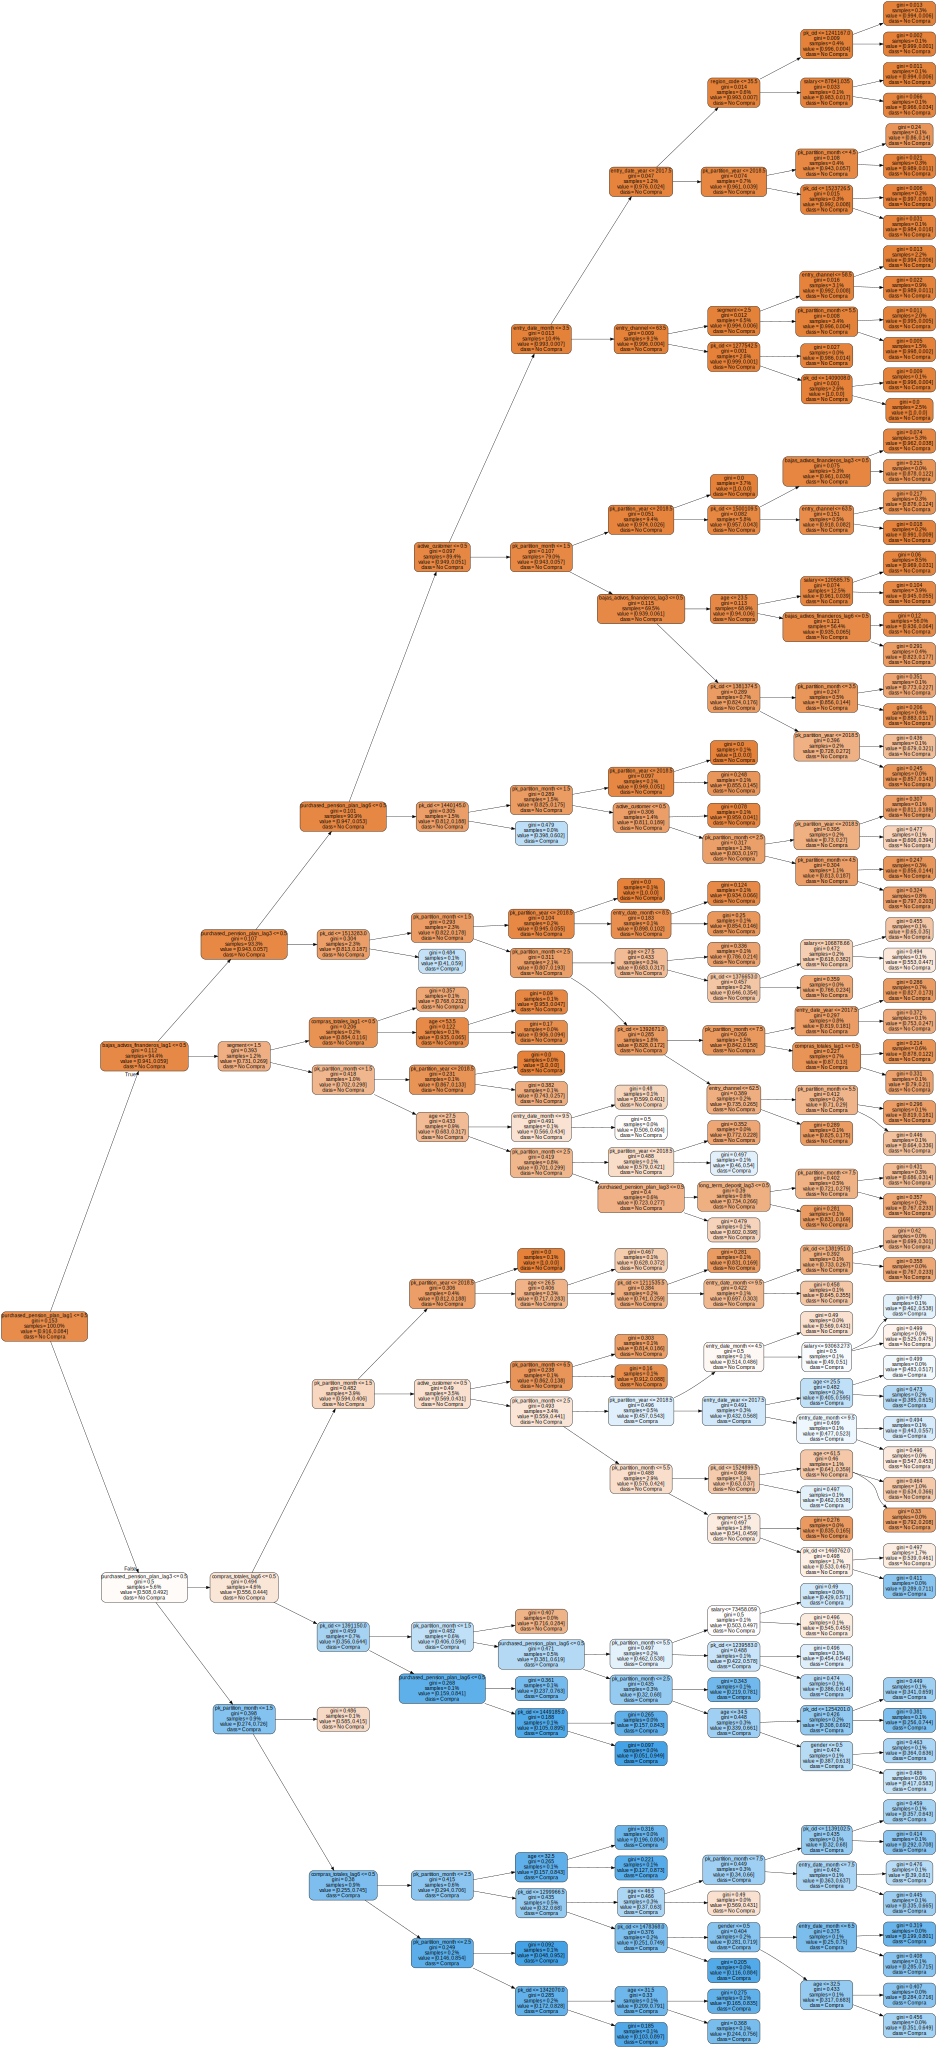

In [183]:
import graphviz
graphviz.Source(dot_data)

#Feature Importance

In [184]:
features = X_train.columns.to_list()

In [185]:
features

['pk_cid',
 'entry_channel',
 'active_customer',
 'segment',
 'country_id',
 'region_code',
 'gender',
 'age',
 'salary',
 'compras_totales_lag1',
 'compras_totales_lag3',
 'compras_totales_lag6',
 'activos_financieros_binario_lag1',
 'activos_financieros_binario_lag3',
 'activos_financieros_binario_lag6',
 'bajas_activos_financieros_lag1',
 'bajas_activos_financieros_lag3',
 'bajas_activos_financieros_lag6',
 'long_term_deposit_lag1',
 'long_term_deposit_lag3',
 'long_term_deposit_lag6',
 'purchased_pension_plan_lag1',
 'purchased_pension_plan_lag3',
 'purchased_pension_plan_lag6',
 'pk_partition_year',
 'pk_partition_month',
 'entry_date_year',
 'entry_date_month']

In [186]:
pd.Series(primer_modelo_DT.feature_importances_, index=features ).sort_values(ascending=False).head(30)

purchased_pension_plan_lag1         0.685637
purchased_pension_plan_lag3         0.072539
pk_partition_month                  0.056733
bajas_activos_financieros_lag1      0.035738
pk_cid                              0.027386
compras_totales_lag6                0.027279
active_customer                     0.024421
purchased_pension_plan_lag6         0.022098
pk_partition_year                   0.014345
age                                 0.010215
segment                             0.006494
bajas_activos_financieros_lag3      0.006479
bajas_activos_financieros_lag6      0.003613
salary                              0.001693
entry_channel                       0.001389
entry_date_month                    0.001314
compras_totales_lag1                0.001080
entry_date_year                     0.000839
long_term_deposit_lag3              0.000503
gender                              0.000195
region_code                         0.000011
activos_financieros_binario_lag3    0.000000
activos_fi

In [187]:
#Evaluacion

y_test_pred = pd.DataFrame(primer_modelo_DT.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [188]:
results_df = y_test.join(y_test_pred, how = 'inner')

In [189]:
results_df.head(10)

,activos_financieros_binario,Purchase_Prediction
921830,1,0
195736,0,0
176409,0,0
3980036,0,0
3558878,0,0
4538760,0,0
17219,0,0
4074660,0,0
2386019,0,0
430848,0,0


In [190]:
results_df['Sucess']=(results_df['activos_financieros_binario']==results_df['Purchase_Prediction']).astype(int)

In [191]:
results_df.head(10)

,activos_financieros_binario,Purchase_Prediction,Sucess
921830,1,0,0
195736,0,0,1
176409,0,0,1
3980036,0,0,1
3558878,0,0,1
4538760,0,0,1
17219,0,0,1
4074660,0,0,1
2386019,0,0,1
430848,0,0,1


In [192]:
results_df['Sucess'].mean()


0.9239150240378999

In [193]:
primer_modelo_DT.score(X_test,y_test)

0.9239150240378999

### Metodos de Evaluacion

#### CONFUSSION MATRIX

In [194]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df['activos_financieros_binario'],results_df['Purchase_Prediction'])

In [195]:
confusion_matrix


Purchase_Prediction,0,1
activos_financieros_binario,,
0,194775,1475
1,14810,2977


In [196]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [197]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 2977
TN = 194775
FP = 1475
FN = 14810


In [198]:
round(TP/X_test.shape[0]*100,2)

1.39

In [199]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9239150240378999

#### Prediccion en forma probabilistica

In [200]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(primer_modelo_DT.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])



In [201]:
results_df=results_df.join(y_score)


In [202]:
results_df


,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
921830,1,0,0,0.365658
195736,0,0,1,0.000000
176409,0,0,1,0.063982
3980036,0,0,1,0.030905
3558878,0,0,1,0.002327
...,...,...,...,...
4257932,0,0,1,0.000234
3975483,0,0,1,0.063982
4549299,0,0,1,0.030905
4466698,0,0,1,0.030905


In [203]:
 #Probaremos con un threshold de 0.3 para ver la variacion de los valores
results_df['Purchase_Prediction03']= (results_df['Purchase_Score'] >= 0.3).astype(int)

In [204]:
results_df['Success03'] = (results_df[TARGET_GENERAL] == results_df['Purchase_Prediction03']).astype(int)

In [205]:
results_df['Success03'].mean()

0.91506141461523

#### F1 SCORE

In [206]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.2677278654615765

In [207]:
precision = precision_score(y_test, y_test_pred)

In [208]:
precision

0.6686882300089847

In [209]:
recall = recall_score(y_test, y_test_pred)

In [210]:
recall

0.16736942710968686

#### ROC CURVE

In [211]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df['activos_financieros_binario'],results_df['Purchase_Score'])
#SUPER IMPORTANTE METER LA PROBABILIDAD ! !
#!! Si veo un triangulo le he pasado la prediccion y tengo q pasar la probabilaid


Text(0, 0.5, 'TPR')

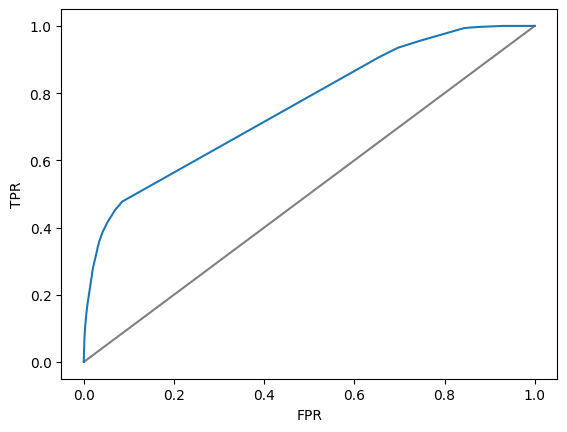

In [212]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [213]:
metrics.roc_auc_score(results_df['activos_financieros_binario'],results_df['Purchase_Score'])

0.7606862833694831

In [214]:
results_df

,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score,Purchase_Prediction03,Success03
921830,1,0,0,0.365658,1,1
195736,0,0,1,0.000000,0,1
176409,0,0,1,0.063982,0,1
3980036,0,0,1,0.030905,0,1
3558878,0,0,1,0.002327,0,1
...,...,...,...,...,...,...
4257932,0,0,1,0.000234,0,1
3975483,0,0,1,0.063982,0,1
4549299,0,0,1,0.030905,0,1
4466698,0,0,1,0.030905,0,1


In [215]:
results_df.head()

,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score,Purchase_Prediction03,Success03
921830,1,0,0,0.365658,1,1
195736,0,0,1,0.000000,0,1
176409,0,0,1,0.063982,0,1
3980036,0,0,1,0.030905,0,1
3558878,0,0,1,0.002327,0,1


### Modelos Alternativos

#### RandomForest

In [216]:
segundo_modelo_RF=RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_leaf=100)

In [217]:
segundo_modelo_RF.fit(X_train, y_train)

<ipython-input-217-68f1f4ed41e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  segundo_modelo_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, min_samples_leaf=100)

In [218]:
#Aplicando Random Forest.
segundo_modelo_RF.score(val_df_X, val_df_y)

0.9326962271842022

#### XGBoost

In [219]:
tercer_modelo_XGB = xgb.XGBClassifier(n_estimators = 100, max_depth = 9, random_state = 42)

In [220]:
tercer_modelo_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [221]:
y_pred = tercer_modelo_XGB.predict(X_test)

In [222]:
accuracy = accuracy_score(y_test, y_pred)

In [223]:
accuracy

0.9253773880216972

In [224]:
tercer_modelo_XGB.score(val_df_X, val_df_y)

0.9324810906291046

### Rebalanceo

In [225]:
df_dev_zero = dev_df[dev_df[TARGET_GENERAL] == 0]
df_dev_nonzero = dev_df[dev_df[TARGET_GENERAL] > 0]


In [226]:
df_dev_zero.info(verbose = False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 980888 entries, 1 to 4822275
Columns: 29 entries, pk_cid to entry_date_month
dtypes: float64(16), int64(13)
memory usage: 224.5 MB


In [227]:
df_dev_nonzero.info(verbose = False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 89293 entries, 19 to 4818173
Columns: 29 entries, pk_cid to entry_date_month
dtypes: float64(16), int64(13)
memory usage: 20.4 MB


In [228]:
n_zero = len(df_dev_nonzero)*3

In [229]:
n_zero

267879

In [230]:
n_zero + 79590

347469

In [231]:
df_dev_zero_sample = df_dev_zero.sample(n = n_zero, random_state = 42 )


In [232]:
df_dev_zero_sample.shape


(267879, 29)

In [233]:
df_dev_nonzero.shape


(89293, 29)

In [234]:
len(df_dev_nonzero) / len(df_dev_zero_sample)

0.3333333333333333

In [235]:
df_dev_sample = pd.concat([df_dev_zero_sample,df_dev_nonzero])


In [236]:
df_dev_sample_X = df_dev_sample.drop(TARGET_GENERAL, axis = 1)
df_dev_sample_y = df_dev_sample[[TARGET_GENERAL]]


In [237]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_sample_X,
    df_dev_sample_y,
    random_state = 42,
    test_size = .3
)

In [238]:
X_train.shape


(250020, 28)

In [239]:
X_test.shape

(107152, 28)

In [240]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,250020.0,1.250917e+06,179252.233382,16203.00,1134968.00,1262811.00,1382747.00,1547456.00
entry_channel,250020.0,4.950433e+01,14.742826,0.00,45.00,57.00,60.00,68.00
active_customer,250020.0,9.092993e-01,0.287184,0.00,1.00,1.00,1.00,1.00
segment,250020.0,2.263595e+00,0.657826,-1.00,2.00,2.00,3.00,3.00
country_id,250020.0,9.993960e-01,0.024568,0.00,1.00,1.00,1.00,1.00
region_code,250020.0,2.643308e+01,13.043214,0.00,15.00,28.00,35.00,52.00
gender,250020.0,4.464803e-01,0.497128,0.00,0.00,0.00,1.00,1.00
age,250020.0,3.618866e+01,13.157702,16.00,26.00,34.00,43.00,102.00
salary,250020.0,1.120142e+05,171606.579431,5163.75,66118.68,89648.28,126433.38,28894395.51
compras_totales_lag1,250020.0,2.214703e-01,0.415237,0.00,0.00,0.00,0.00,1.00


In [241]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,107152.0,1.251536e+06,178362.043811,16502.00,1135557.00,1263329.50,1383044.75,1547739.00
entry_channel,107152.0,4.946595e+01,14.797849,0.00,45.00,57.00,60.00,68.00
active_customer,107152.0,9.091944e-01,0.287334,0.00,1.00,1.00,1.00,1.00
segment,107152.0,2.265651e+00,0.657537,-1.00,2.00,2.00,3.00,3.00
country_id,107152.0,9.994027e-01,0.024432,0.00,1.00,1.00,1.00,1.00
region_code,107152.0,2.638835e+01,13.033163,0.00,15.00,28.00,35.00,52.00
gender,107152.0,4.449940e-01,0.496967,0.00,0.00,0.00,1.00,1.00
age,107152.0,3.618051e+01,13.158285,16.00,26.00,34.00,43.00,102.00
salary,107152.0,1.116677e+05,158993.875977,5163.75,66055.95,89375.07,126228.84,24253236.93
compras_totales_lag1,107152.0,2.215264e-01,0.415276,0.00,0.00,0.00,0.00,1.00


In [242]:
for i in range(1,20):
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= 100)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')

Profundidad del arbol 1: Train 0.808 , Test 0.808, Overfit 0.0
Profundidad del arbol 2: Train 0.808 , Test 0.808, Overfit 0.0
Profundidad del arbol 3: Train 0.811 , Test 0.811, Overfit 0.0
Profundidad del arbol 4: Train 0.813 , Test 0.813, Overfit 0.0
Profundidad del arbol 5: Train 0.814 , Test 0.814, Overfit 0.0
Profundidad del arbol 6: Train 0.816 , Test 0.815, Overfit 0.001
Profundidad del arbol 7: Train 0.817 , Test 0.817, Overfit 0.0
Profundidad del arbol 8: Train 0.818 , Test 0.817, Overfit 0.001
Profundidad del arbol 9: Train 0.818 , Test 0.817, Overfit 0.001
Profundidad del arbol 10: Train 0.819 , Test 0.819, Overfit 0.0
Profundidad del arbol 11: Train 0.819 , Test 0.819, Overfit 0.0
Profundidad del arbol 12: Train 0.82 , Test 0.818, Overfit 0.002
Profundidad del arbol 13: Train 0.821 , Test 0.819, Overfit 0.002
Profundidad del arbol 14: Train 0.821 , Test 0.819, Overfit 0.002
Profundidad del arbol 15: Train 0.822 , Test 0.818, Overfit 0.004
Profundidad del arbol 16: Train 0.82

In [243]:
#Modelling

primer_modelo_RE_DT=DecisionTreeClassifier( max_depth=9, min_samples_leaf=350, random_state=42 )



In [244]:
primer_modelo_RE_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=350, random_state=42)

In [245]:
#funcion directa
primer_modelo_RE_DT.score(val_df_X, val_df_y)

0.9269328321029032

In [246]:
#Evaluacion

y_test_pred = pd.DataFrame(primer_modelo_RE_DT.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [247]:
results_df_2 = y_test.join(y_test_pred, how = 'inner')

In [248]:
results_df_2.head(10)

,activos_financieros_binario,Purchase_Prediction
2792505,0,0
3785711,0,0
1380171,1,1
2696776,0,0
3944959,1,0
3998107,0,0
4346393,0,0
592692,0,0
3106473,1,0
4544266,1,1


In [249]:
results_df_2['Sucess']=(results_df_2['activos_financieros_binario']==results_df_2['Purchase_Prediction']).astype(int)

In [250]:
results_df_2.head(10)

,activos_financieros_binario,Purchase_Prediction,Sucess
2792505,0,0,1
3785711,0,0,1
1380171,1,1,1
2696776,0,0,1
3944959,1,0,0
3998107,0,0,1
4346393,0,0,1
592692,0,0,1
3106473,1,0,0
4544266,1,1,1


In [251]:
results_df_2['Sucess'].mean()


0.816261012393609

In [252]:
primer_modelo_RE_DT.score(X_test,y_test)

0.816261012393609

### Metodos de Evaluacion

#### CONFUSSION MATRIX

In [253]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df_2['activos_financieros_binario'],results_df_2['Purchase_Prediction'])

In [254]:
confusion_matrix


Purchase_Prediction,0,1
activos_financieros_binario,,
0,77036,3274
1,16414,10428


In [255]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [256]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 10428
TN = 77036
FP = 3274
FN = 16414


In [257]:
round(TP/X_test.shape[0]*100,2)

9.73

In [258]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.816261012393609

#### Prediccion en forma probabilistica

In [259]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(primer_modelo_RE_DT.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])



In [260]:
results_df_2=results_df_2.join(y_score)


In [261]:
results_df_2


,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
2792505,0,0,1,0.200315
3785711,0,0,1,0.200315
1380171,1,1,1,0.670588
2696776,0,0,1,0.200315
3944959,1,0,0,0.370370
...,...,...,...,...
4373741,0,0,1,0.200315
232832,0,0,1,0.200315
1454348,1,1,1,0.917391
1165044,0,0,1,0.200315


#### F1 SCORE

In [262]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.5144041041831097

In [263]:
precision = precision_score(y_test, y_test_pred)

In [264]:
precision

0.7610567800321121

In [265]:
recall = recall_score(y_test, y_test_pred)

In [266]:
recall

0.38849564115937707

#### ROC CURVE

In [267]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df_2['activos_financieros_binario'],results_df_2['Purchase_Score'])
#SUPER IMPORTANTE METER LA PROBABILIDAD ! !
#!! Si veo un triangulo le he pasado la prediccion y tengo q pasar la probabilaid


Text(0, 0.5, 'TPR')

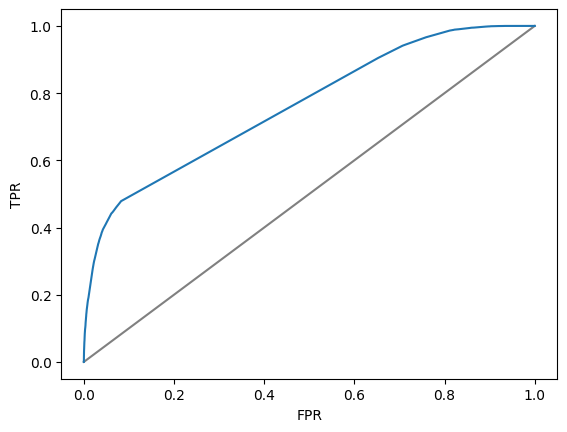

In [268]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [269]:
metrics.roc_auc_score(results_df_2['activos_financieros_binario'],results_df_2['Purchase_Score'])

0.7621203022421192

In [270]:
results_df_2

,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
2792505,0,0,1,0.200315
3785711,0,0,1,0.200315
1380171,1,1,1,0.670588
2696776,0,0,1,0.200315
3944959,1,0,0,0.370370
...,...,...,...,...
4373741,0,0,1,0.200315
232832,0,0,1,0.200315
1454348,1,1,1,0.917391
1165044,0,0,1,0.200315


##SEGUNDO MODELO CON REBALANCEO - Modelo Elegido -

In [271]:
segundo_modelo_RF_RE=RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_leaf=100)

In [272]:
segundo_modelo_RF_RE.fit(X_train, y_train)

<ipython-input-272-2142c7d1c17a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  segundo_modelo_RF_RE.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, min_samples_leaf=100)

In [273]:
#Aplicando Random Forest mejoramos nuestros valores obtenidos en nuestro modelo procesado con Decision Tree.
segundo_modelo_RF_RE.score(val_df_X, val_df_y)

0.9302504642420399

In [274]:
y_test_pred = pd.DataFrame(segundo_modelo_RF_RE.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [275]:
results_df_3 = y_test.join(y_test_pred, how = 'inner')

In [276]:
results_df_3.head(10)

,activos_financieros_binario,Purchase_Prediction
2792505,0,0
3785711,0,0
1380171,1,1
2696776,0,0
3944959,1,1
3998107,0,0
4346393,0,0
592692,0,0
3106473,1,0
4544266,1,1


In [277]:
results_df_3['Sucess']=(results_df_3['activos_financieros_binario']==results_df_3['Purchase_Prediction']).astype(int)

In [278]:
results_df_3.head()

,activos_financieros_binario,Purchase_Prediction,Sucess
2792505,0,0,1
3785711,0,0,1
1380171,1,1,1
2696776,0,0,1
3944959,1,1,1


In [279]:
results_df_3['Sucess'].mean()

0.8145718232044199

In [280]:
segundo_modelo_RF_RE.score(X_test,y_test)

0.8145718232044199

#### CONFUSSION MATRIX

In [281]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df_3['activos_financieros_binario'],results_df_3['Purchase_Prediction'])

In [282]:
confusion_matrix


Purchase_Prediction,0,1
activos_financieros_binario,,
0,77570,2740
1,17129,9713


In [283]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [284]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 9713
TN = 77570
FP = 2740
FN = 17129


In [285]:
round(TP/X_test.shape[0]*100,2)

9.06

In [286]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8145718232044199

In [287]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])


In [288]:
y_score

,Purchase_Score
2792505,0.182924
3785711,0.185322
1380171,0.559573
2696776,0.178190
3944959,0.606270
...,...
4373741,0.223399
232832,0.181598
1454348,0.895870
1165044,0.181926


In [289]:
results_df_3=results_df_3.join(y_score)


In [290]:
results_df_3


,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
2792505,0,0,1,0.182924
3785711,0,0,1,0.185322
1380171,1,1,1,0.559573
2696776,0,0,1,0.178190
3944959,1,1,1,0.606270
...,...,...,...,...
4373741,0,0,1,0.223399
232832,0,0,1,0.181598
1454348,1,1,1,0.895870
1165044,0,0,1,0.181926


#### F1 SCORE

In [291]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.49436315052805707

In [292]:
precision = precision_score(y_test, y_test_pred)

In [293]:
precision

0.7799726973420059

In [294]:
recall = recall_score(y_test, y_test_pred)

In [295]:
recall

0.36185828179718355

In [296]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df_3['activos_financieros_binario'],results_df_3['Purchase_Score'])



Text(0, 0.5, 'TPR')

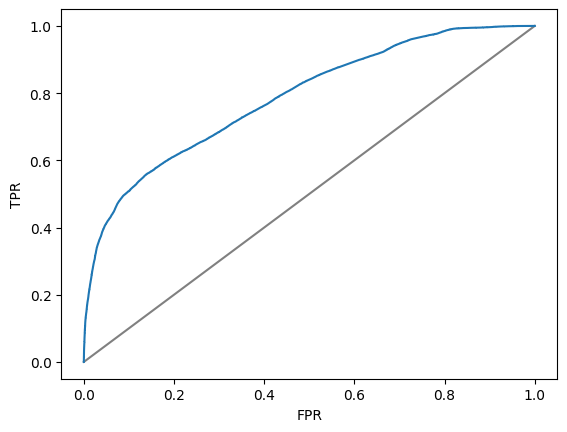

In [297]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [298]:
metrics.roc_auc_score(results_df_3['activos_financieros_binario'],results_df_3['Purchase_Score'])

0.7865333076968873

In [299]:
results_df_3

,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
2792505,0,0,1,0.182924
3785711,0,0,1,0.185322
1380171,1,1,1,0.559573
2696776,0,0,1,0.178190
3944959,1,1,1,0.606270
...,...,...,...,...
4373741,0,0,1,0.223399
232832,0,0,1,0.181598
1454348,1,1,1,0.895870
1165044,0,0,1,0.181926


In [300]:
#### XGBoost, aplicamos este modelo, pero en la conclusion final no sera el modelo que mejores resultados obtiene.

In [301]:
tercer_modelo_XGB_RE = xgb.XGBClassifier(n_estimators = 100, max_depth = 9, random_state = 42)

In [302]:
tercer_modelo_XGB_RE.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [303]:
y_pred = tercer_modelo_XGB_RE.predict(X_test)

In [304]:
accuracy = accuracy_score(y_test, y_pred)

In [305]:
accuracy

0.8250335971330447

In [306]:
tercer_modelo_XGB_RE.score(val_df_X, val_df_y)

0.9194823135105756

#Analisis de la variable objetivo utilizando el Modelo 2 /Random Forest/ REBALANCEADO:

In [307]:
df_analisis1=df_cust_demo3.copy()

In [308]:
df_analisis1.set_index('pk_cid',inplace=True)

In [309]:
df_analisis1 = df_analisis1[(df_analisis1['pk_partition_year'] == 2019) &
                            (df_analisis1['pk_partition_month'] == 5)]

# Seleccionando solamente la columna 'purchased_pension_plan_binario'
df_analisis1 = df_analisis1[['activos_financieros_binario']]
df_analisis1

,activos_financieros_binario
pk_cid,
16203,0
16502,0
17457,0
17970,0
18146,0
...,...
1548197,1
1548197,1
1548201,0


### Conclusion Probabilidad final de compra de producto

In [310]:
y_test_predJUNIO = pd.DataFrame(segundo_modelo_RF_RE.predict(val_df_X), index = val_df_y.index, columns = ['Purchase_Prediction'])


In [311]:
y_test_predJUNIO


,Purchase_Prediction
5,0
6,0
29,0
55,0
78,0
...,...
4822468,1
4822469,1
4822470,0
4822471,0


In [312]:
y_test_predJUNIO.value_counts()


Purchase_Prediction
0                      82963
1                       5353
dtype: int64

In [313]:
results_df_3JUNIO = val_df_y.join(y_test_predJUNIO, how = 'inner')


In [314]:
results_df_3JUNIO.head(10)


,activos_financieros_binario,Purchase_Prediction
5,0,0
6,0,0
29,0,0
55,0,0
78,0,0
96,0,0
139,0,0
159,0,0
214,0,0
244,0,0


In [315]:
results_df_3JUNIO.sum()


activos_financieros_binario    6681
Purchase_Prediction            5353
dtype: int64

In [316]:
results_df_3JUNIO['Sucess']=(results_df_3JUNIO['activos_financieros_binario']==results_df_3JUNIO['Purchase_Prediction']).astype(int)


In [317]:
results_df_3JUNIO.head()


,activos_financieros_binario,Purchase_Prediction,Sucess
5,0,0,1
6,0,0,1
29,0,0,1
55,0,0,1
78,0,0,1


In [318]:
results_df_3JUNIO['Sucess'].mean()


0.9302504642420399

In [319]:
segundo_modelo_RF_RE.score(val_df_X,val_df_y)

0.9302504642420399

### Conclusion Prediccion Probabilista de compra del producto (Pension Plan)

In [320]:
y_scoreJUNIO=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(val_df_X)[:,1],index=val_df_y.index,columns=['Purchase_Score'])


In [321]:
y_scoreJUNIO


,Purchase_Score
5,0.187000
6,0.200892
29,0.194876
55,0.180544
78,0.192538
...,...
4822468,0.749214
4822469,0.930184
4822470,0.111732
4822471,0.217719


In [322]:
results_df_3JUNIO


,activos_financieros_binario,Purchase_Prediction,Sucess
5,0,0,1
6,0,0,1
29,0,0,1
55,0,0,1
78,0,0,1
...,...,...,...
4822468,1,1,1
4822469,1,1,1
4822470,0,0,1
4822471,0,0,1


In [323]:
results_df_3JUNIO=results_df_3JUNIO.join(y_scoreJUNIO)


In [324]:
results_df_3JUNIO


,activos_financieros_binario,Purchase_Prediction,Sucess,Purchase_Score
5,0,0,1,0.187000
6,0,0,1,0.200892
29,0,0,1,0.194876
55,0,0,1,0.180544
78,0,0,1,0.192538
...,...,...,...,...
4822468,1,1,1,0.749214
4822469,1,1,1,0.930184
4822470,0,0,1,0.111732
4822471,0,0,1,0.217719


In [325]:
 #Probaremos con un threshold de 0.5 para ver la variacion de los valores
results_df_3JUNIO['Purchase_Prediction05']= (results_df_3JUNIO['Purchase_Score'] >= 0.5).astype(int)


In [326]:
results_df_3JUNIO['Success05'] = (results_df_3JUNIO[TARGET_GENERAL] == results_df_3JUNIO['Purchase_Prediction05']).astype(int)


In [327]:
results_df_3JUNIO['Success05'].mean()

0.9302504642420399

### Dataframe de analisis de compradores

In [328]:
val_df_X_EstimacionCompras = val_df_X.copy()  # Copia el DataFrame original (solo incluido mayo)


In [329]:
val_df_X_EstimacionCompras.set_index('pk_cid', inplace=True)  # Establece la columna 'pk_cid' como el nuevo índice


In [330]:
val_df_X_EstimacionCompras


,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,
16203,17,1,1,1,8,0,70,126313.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12
16502,62,1,2,1,28,1,58,135263.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9
17457,17,1,2,1,28,1,54,102405.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2019,5,2017,9
17970,17,1,2,1,28,0,76,126718.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2015,4
18146,44,1,1,1,28,0,65,136820.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548197,61,1,2,1,29,0,40,88525.71,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019,5,2019,4
1548197,61,1,2,1,29,0,40,88525.71,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2019,5,2019,4
1548201,61,0,2,1,28,1,36,110966.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4


### Predict

In [331]:
y_test_pred_EstimacionCompras = pd.DataFrame(segundo_modelo_RF_RE.predict(val_df_X), index = val_df_X_EstimacionCompras.index, columns = ['Purchase_Prediction'])


In [332]:
y_test_pred_EstimacionCompras.value_counts()


Purchase_Prediction
0                      82963
1                       5353
dtype: int64

### Predict Proba -- Probabilidad de compra

In [333]:
y_scoreJUNIO=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(val_df_X)[:,1],index = val_df_X_EstimacionCompras.index,columns=['Purchase_Score'])

In [334]:
y_scoreJUNIO_sorted = y_scoreJUNIO.sort_values(by='Purchase_Score', ascending=False)

In [335]:
y_scoreJUNIO_sorted_ProbCompra=y_scoreJUNIO_sorted[y_scoreJUNIO_sorted['Purchase_Score']>=0.5]

In [336]:
y_scoreJUNIO_sorted_ProbCompra

,Purchase_Score
pk_cid,
1489691,0.964210
1489691,0.964210
1509385,0.963730
1515454,0.963354
1500429,0.961430
...,...
1398467,0.500366
1048863,0.500363
1369205,0.500360


In [337]:
y_scoreJUNIO_sorted_ProbCompra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 1489691 to 1169891
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase_Score  5353 non-null   float64
dtypes: float64(1)
memory usage: 83.6 KB


In [338]:
y_test_pred_EstimacionCompras.head()

,Purchase_Prediction
pk_cid,
16203,0
16502,0
17457,0
17970,0
18146,0


In [339]:
ComprasEstimadasJunio=y_test_pred_EstimacionCompras[y_test_pred_EstimacionCompras['Purchase_Prediction']>0]


In [340]:
ComprasEstimadasJunio

,Purchase_Prediction
pk_cid,
41264,1
62064,1
62870,1
66463,1
76927,1
...,...
1548186,1
1548186,1
1548197,1


In [341]:
## queremos que el index 'pk_cid' sea una columna
ComprasEstimadasJunio.reset_index(inplace=True)


In [342]:
## queremos que el index 'pk_cid' sea una columna
y_scoreJUNIO_sorted_ProbCompra.reset_index(inplace=True)

In [343]:
y_scoreJUNIO_sorted_ProbCompra

,pk_cid,Purchase_Score
0,1489691,0.964210
1,1489691,0.964210
2,1509385,0.963730
3,1515454,0.963354
4,1500429,0.961430
...,...,...
5348,1398467,0.500366
5349,1048863,0.500363
5350,1369205,0.500360
5351,1162507,0.500279


In [344]:
ComprasEstimadasJunio.index.name = 'Index'

In [345]:
y_scoreJUNIO_sorted_ProbCompra.index.name = 'Index'

In [346]:
y_scoreJUNIO_sorted_ProbCompra

,pk_cid,Purchase_Score
Index,,
0,1489691,0.964210
1,1489691,0.964210
2,1509385,0.963730
3,1515454,0.963354
4,1500429,0.961430
...,...,...
5348,1398467,0.500366
5349,1048863,0.500363
5350,1369205,0.500360


In [347]:
ComprasEstimadasJunio

,pk_cid,Purchase_Prediction
Index,,
0,41264,1
1,62064,1
2,62870,1
3,66463,1
4,76927,1
...,...,...
5348,1548186,1
5349,1548186,1
5350,1548197,1


In [348]:
#Filtraremos un dataset con los registros pertenecientes a Mayo
df_cust_demo_MAYO =  df_cust_demo3[( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5)]


In [349]:
df_cust_demo_MAYO = df_cust_demo_MAYO.drop_duplicates(subset=['pk_cid'])

In [350]:
df_cust_demo_MAYO

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,activos_financieros_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
5,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12
6,16502,62,1,2,1,28,1,58,135263.28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9
29,17457,17,1,2,1,28,1,54,102405.75,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2019,5,2017,9
55,17970,17,1,2,1,28,0,76,126718.74,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2015,4
78,18146,44,1,1,1,28,0,65,136820.79,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4822464,1548196,61,1,2,1,12,1,32,61087.11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
4822466,1548197,61,1,2,1,29,0,40,88525.71,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
4822470,1548201,61,0,2,1,28,1,36,110966.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
4822471,1548202,61,1,2,1,28,0,22,144820.14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4


In [351]:
# Combina los DataFrames basados en 'pk_cid'
ComprasEstimadasJunio = ComprasEstimadasJunio.merge(df_cust_demo_MAYO[['pk_cid', 'entry_channel', 'active_customer', 'segment', 'country_id', 'region_code', 'gender', 'age', 'salary', 'entry_date_year', 'entry_date_month']], on='pk_cid', how='left')

In [352]:
# Combina los DataFrames basados en 'pk_cid' para tener csv final de probabiliad de compra %
y_scoreJUNIO_sorted_ProbCompra = y_scoreJUNIO_sorted_ProbCompra.merge(df_cust_demo_MAYO[['pk_cid', 'entry_channel', 'active_customer', 'segment', 'country_id', 'region_code', 'gender', 'age', 'salary', 'entry_date_year', 'entry_date_month']], on='pk_cid', how='left')

In [353]:
ComprasEstimadasJunio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 0 to 5352
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pk_cid               5353 non-null   int64  
 1   Purchase_Prediction  5353 non-null   int64  
 2   entry_channel        5353 non-null   int64  
 3   active_customer      5353 non-null   int64  
 4   segment              5353 non-null   int64  
 5   country_id           5353 non-null   int64  
 6   region_code          5353 non-null   int64  
 7   gender               5353 non-null   int64  
 8   age                  5353 non-null   int64  
 9   salary               5353 non-null   float64
 10  entry_date_year      5353 non-null   int64  
 11  entry_date_month     5353 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 543.7 KB


In [354]:
y_scoreJUNIO_sorted_ProbCompra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 0 to 5352
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            5353 non-null   int64  
 1   Purchase_Score    5353 non-null   float64
 2   entry_channel     5353 non-null   int64  
 3   active_customer   5353 non-null   int64  
 4   segment           5353 non-null   int64  
 5   country_id        5353 non-null   int64  
 6   region_code       5353 non-null   int64  
 7   gender            5353 non-null   int64  
 8   age               5353 non-null   int64  
 9   salary            5353 non-null   float64
 10  entry_date_year   5353 non-null   int64  
 11  entry_date_month  5353 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 543.7 KB


In [355]:
df_cust_demo_MAYO[df_cust_demo_MAYO['pk_cid']==1465864]

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,activos_financieros_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,bajas_activos_financieros_lag1,bajas_activos_financieros_lag3,bajas_activos_financieros_lag6,long_term_deposit_lag1,long_term_deposit_lag3,long_term_deposit_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
4551382,1465864,61,1,2,1,3,0,31,64380.3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9


In [356]:
ComprasEstimadasJunio.head(30)

,pk_cid,Purchase_Prediction,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,41264,1,63,1,2,1,28,1,52,129237.48,2019,3
1,62064,1,17,1,2,1,28,1,46,171654.87,2017,3
2,62870,1,61,1,2,1,41,1,43,79345.56,2018,10
3,66463,1,17,1,1,1,28,0,63,139093.50,2016,4
4,76927,1,62,1,2,1,8,1,75,107702.55,2019,3
5,106220,1,44,1,2,1,28,1,86,74799.30,2016,2
6,120751,1,17,1,2,1,28,1,66,188533.59,2016,1
7,192005,1,17,1,2,1,28,1,51,105289.26,2016,2
8,212284,1,17,1,2,1,8,1,51,185797.02,2018,1
9,235205,1,17,1,2,1,46,1,45,115000.71,2017,1


In [357]:
y_scoreJUNIO_sorted_ProbCompra.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
1,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
2,1509385,0.963730,61,1,2,1,28,0,41,112205.88,2018,11
3,1515454,0.963354,62,1,2,1,35,0,47,78664.86,2018,12
4,1500429,0.961430,62,1,2,1,21,1,44,62801.37,2018,11
5,1515844,0.960997,63,1,2,1,28,0,31,115550.85,2018,12
6,1493901,0.960306,62,1,2,1,8,1,30,112508.43,2018,10
7,1474733,0.959558,62,1,2,1,18,0,30,81610.44,2018,10
8,1518305,0.959435,61,1,2,1,14,1,34,66933.90,2018,12
9,1496313,0.958747,61,1,2,1,8,1,55,132859.17,2018,11


In [358]:
ComprasEstimadasJunio['Purchase_Prediction'].value_counts()

1    5353
Name: Purchase_Prediction, dtype: int64

### Percentiles Prediccion de Compra Dataset

In [359]:

percentile_75 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.75)

In [360]:
percentile_75

0.7619120027282951

In [361]:
above_percentile_75 = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_75]

In [362]:
above_percentile_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            1338 non-null   int64  
 1   Purchase_Score    1338 non-null   float64
 2   entry_channel     1338 non-null   int64  
 3   active_customer   1338 non-null   int64  
 4   segment           1338 non-null   int64  
 5   country_id        1338 non-null   int64  
 6   region_code       1338 non-null   int64  
 7   gender            1338 non-null   int64  
 8   age               1338 non-null   int64  
 9   salary            1338 non-null   float64
 10  entry_date_year   1338 non-null   int64  
 11  entry_date_month  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 135.9 KB


In [363]:
above_percentile_75.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
1,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
2,1509385,0.963730,61,1,2,1,28,0,41,112205.88,2018,11
3,1515454,0.963354,62,1,2,1,35,0,47,78664.86,2018,12
4,1500429,0.961430,62,1,2,1,21,1,44,62801.37,2018,11
5,1515844,0.960997,63,1,2,1,28,0,31,115550.85,2018,12
6,1493901,0.960306,62,1,2,1,8,1,30,112508.43,2018,10
7,1474733,0.959558,62,1,2,1,18,0,30,81610.44,2018,10
8,1518305,0.959435,61,1,2,1,14,1,34,66933.90,2018,12
9,1496313,0.958747,61,1,2,1,8,1,55,132859.17,2018,11


In [364]:
y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].describe()

count    5353.000000
mean        0.729771
std         0.108018
min         0.500173
25%         0.706429
50%         0.722284
75%         0.761912
max         0.964210
Name: Purchase_Score, dtype: float64

In [365]:

percentile_50 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.50)

In [366]:
percentile_50

0.7222837414752407

In [367]:
above_percentile_50 = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_50]

In [368]:
above_percentile_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            2676 non-null   int64  
 1   Purchase_Score    2676 non-null   float64
 2   entry_channel     2676 non-null   int64  
 3   active_customer   2676 non-null   int64  
 4   segment           2676 non-null   int64  
 5   country_id        2676 non-null   int64  
 6   region_code       2676 non-null   int64  
 7   gender            2676 non-null   int64  
 8   age               2676 non-null   int64  
 9   salary            2676 non-null   float64
 10  entry_date_year   2676 non-null   int64  
 11  entry_date_month  2676 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 271.8 KB


In [369]:
above_percentile_50.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
1,1489691,0.964210,61,1,2,1,28,0,46,120052.53,2018,10
2,1509385,0.963730,61,1,2,1,28,0,41,112205.88,2018,11
3,1515454,0.963354,62,1,2,1,35,0,47,78664.86,2018,12
4,1500429,0.961430,62,1,2,1,21,1,44,62801.37,2018,11
5,1515844,0.960997,63,1,2,1,28,0,31,115550.85,2018,12
6,1493901,0.960306,62,1,2,1,8,1,30,112508.43,2018,10
7,1474733,0.959558,62,1,2,1,18,0,30,81610.44,2018,10
8,1518305,0.959435,61,1,2,1,14,1,34,66933.90,2018,12
9,1496313,0.958747,61,1,2,1,8,1,55,132859.17,2018,11


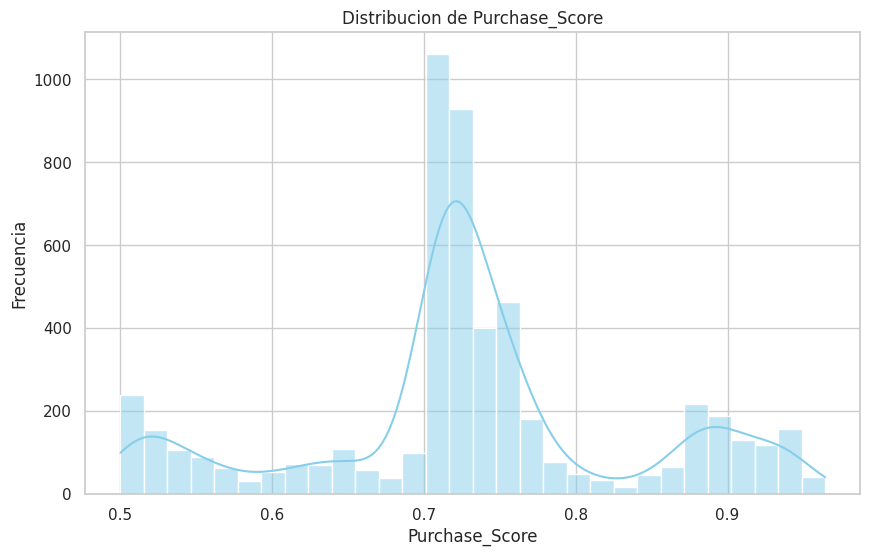

In [370]:
sns.set_theme(style="whitegrid")
# 1. Distribution of Purchase_Score
plt.figure(figsize=(10, 6))
sns.histplot(y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribucion de Purchase_Score')
plt.xlabel('Purchase_Score')
plt.ylabel('Frecuencia')
plt.show()

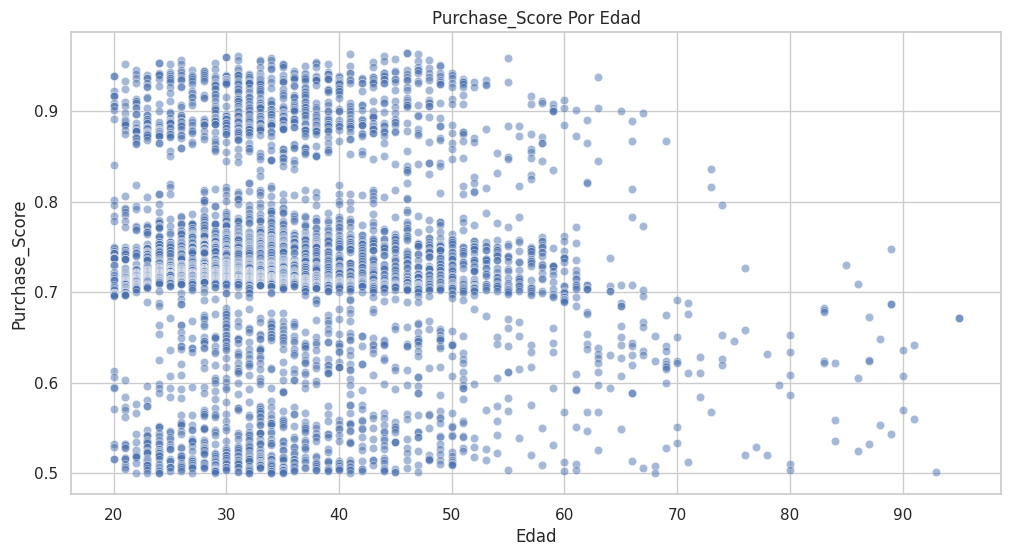

In [371]:
# 3. Purchase_Score Por Edad
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Purchase_Score', data=y_scoreJUNIO_sorted_ProbCompra, alpha=0.5)
plt.title('Purchase_Score Por Edad')
plt.xlabel('Edad')
plt.ylabel('Purchase_Score')
plt.show()

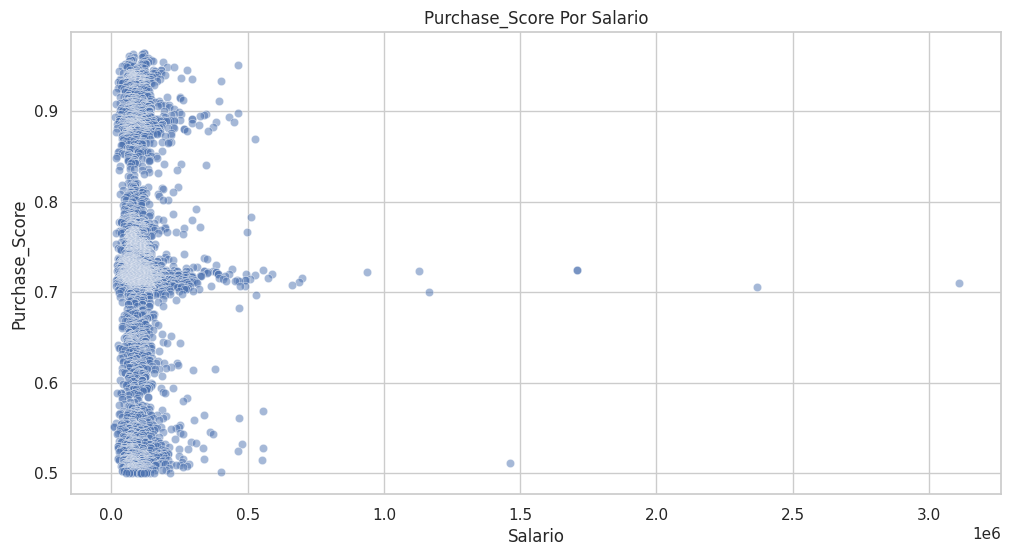

In [372]:
# 4. Purchase_Score Por Salario
plt.figure(figsize=(12, 6))
sns.scatterplot(x='salary', y='Purchase_Score', data=y_scoreJUNIO_sorted_ProbCompra, alpha=0.5)
plt.title('Purchase_Score Por Salario')
plt.xlabel('Salario')
plt.ylabel('Purchase_Score')
plt.show()

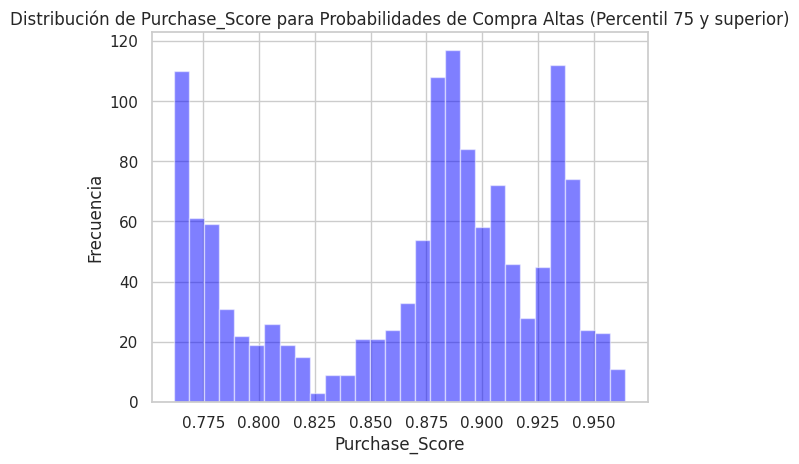

In [373]:
# Calcula el percentil 75
percentile_75 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.75)
# Filtra los valores por encima del percentil 75
high_probability_purchase = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_75]
# Crea un histograma de los valores de 'Purchase_Score' por encima del percentil 75
plt.hist(high_probability_purchase['Purchase_Score'], bins=30, alpha=0.5, color='blue')
plt.xlabel('Purchase_Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Purchase_Score para Probabilidades de Compra Altas (Percentil 75 y superior)')
# Muestra el gráfico
plt.show()

<ipython-input-374-2495b2a14d34>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], shade=True)


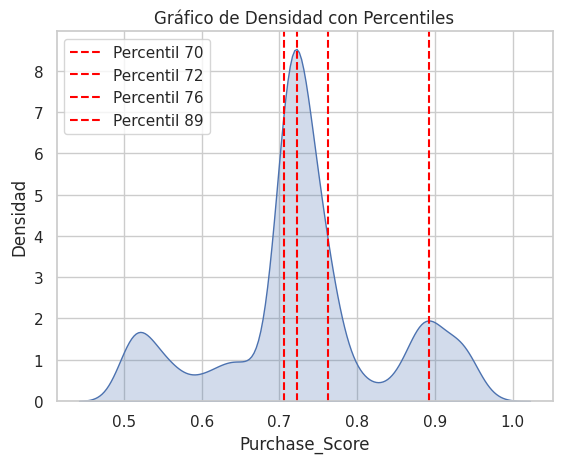

In [374]:
percentiles_to_plot = [0.25, 0.50, 0.75, 0.90]
percentile_data = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(percentiles_to_plot)
sns.kdeplot(data=y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], shade=True)
for percentile in percentile_data:
    plt.axvline(x=percentile, color='red', linestyle='--', label=f'Percentil {int(percentile * 100)}')
plt.xlabel('Purchase_Score')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad con Percentiles')
plt.legend()
plt.show()

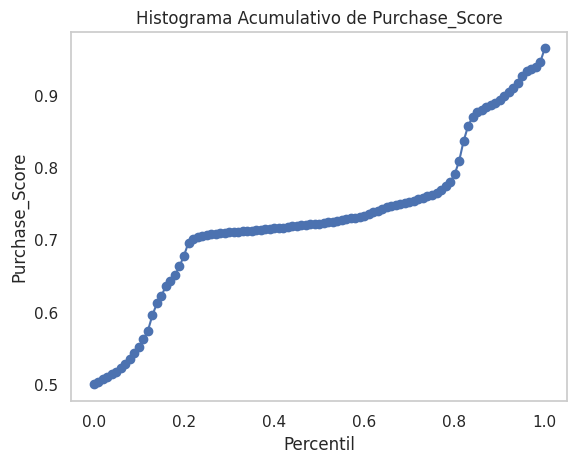

In [375]:
percentiles_to_plot = np.arange(0, 1.01, 0.01)
percentile_values = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(percentiles_to_plot)
plt.plot(percentiles_to_plot, percentile_values, marker='o')
plt.xlabel('Percentil')
plt.ylabel('Purchase_Score')
plt.title('Histograma Acumulativo de Purchase_Score')
plt.grid()
plt.show()

### Analisis percentiles

In [376]:
#Vemos que en el percentil 50 englobaria a mas clientes y con los graficos se nota la tendencia en la probabilidad de compra.

In [377]:
above_percentile_50.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Activos_Financieros/Percentil_50_ActivosFinancieros_V2.csv', index=False)

In [378]:
# Exportamos .csv para analizar el PowerBI y mostrar conclusiones finales respecto a % Probabilidades de compra ordenados
y_scoreJUNIO_sorted_ProbCompra.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Activos_Financieros/ProbabilidadCompra_ActivosFinancieros_V2.csv', index=False)

In [379]:
# Exportamos .csv para analizar el PowerBI y mostrar conclusiones finales.
ComprasEstimadasJunio.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Activos_Financieros/ComprasEstimadasJunioAnalisis_ActivosFinancieros_V2.csv', index=False)

###PICKLE FINAL Y EXPORTACION DEL ARCHIVO

In [380]:
df_cust_demo3.to_pickle("/content/drive/MyDrive/TFM/pickle's/Activos_Financieros/pickle3_Activos_Financieros.pkl")